# PyEIS: Tutorial on Impedance Simulation and Fitting
This notebook introduces how to use PyEIS in Jupyter Lab to simulate electrochemical impedance spectras using build-in equivalent circuit models and later, we will cover how to fit simulated spectras contained within the equivalent circuit overview. In the current version, the following equivalent cirucits are incorporated:
- RC
- RQ
- R-RQ
- R-RQ-RQ
- R-(Q(RW)) (Randles)
- R-(Q(RW)) (Simplified Randles)
- C-RC-C
- Q-RQ-Q
- RC-RC-ZD
- R-TLsQ (Simplified transmission Line)
- R-RQ-TLsQ
- R-TLs
- R-RQ-TLs
- R-TL (Transmission Line with full complexity)
- R-RQ-TL
- R-TL_1Dsolid (includes 1D solid-state diffusion)
- R-RQ-TL_1Dsolid (includes 1D solid-state diffusion)

The Initial step, is to import the PyEIS into your notebook, by using the following line:

In [1]:
#Definitions
from PyEIS import *


---> Data Extraction Script Loaded (v. 0.0.2 - 06/27/18)

---> Linear Kramers-Kronig Script Loaded (v. 0.0.9 - 11/11/18)

---> EIS Advanced Tools Loaded (v. 0.0.2 - 06/15/18)

---> Impedance Analyzer Core Loaded (v. 0.4.9 - 11/27/18)



Notice that four different script are loaded, which informs you that PyEIS is imported

## Frequency range
The first first step needed to simulate an electrochemical impedance spectra is to generate a frequency domain, to do so, use to build-in freq_gen() function, as follows

In [2]:
f_range = freq_gen(f_start=10**6, f_stop=0.01, pts_decade=7)
print(f_range[0][:4]) #First 5 points in the freq. array
print()
print(f_range[1][:4]) #First 5 points in the angular freq. array

[ 1000000.           715394.26543765   511788.95502107   366130.8835364 ]

[ 6283185.30717959  4494954.73743837  3215664.8425652   2300468.18794061]


Note that all functions included are described, to access these descriptions stay within () and press shift+tab. The freq_gen(), returns both the frequency, which is log seperated based on points/decade between f_start to f_stop, and the angular frequency. This function is quite useful and will be used through this tutorial

## The Equivalent Circuits
There exist a number of equivalent circuits that can be simulated and fitted, these functions are made as definations and can be called at any time. To find these, write: "cir_" and hit tab. All functions are outline in the next cell and can also be viewed in the equivalent circuit overview:

In [3]:
cir_RC
cir_RQ
cir_RsRQ
cir_RsRQRQ
cir_Randles
cir_Randles_simplified
cir_C_RC_C
cir_Q_RQ_Q
cir_RCRCZD
cir_RsTLsQ
cir_RsRQTLsQ
cir_RsTLs
cir_RsRQTLs
cir_RsTLQ
cir_RsRQTLQ
cir_RsTL
cir_RsRQTL
cir_RsTL_1Dsolid
cir_RsRQTL_1Dsolid

<function PyEIS.cir_RsRQTL_1Dsolid(w, L, D, radius, Rs, R1, fs1, n1, R2, Q2, n2, R_w, n_w, Rel, Ri, Q1='none')>

To fx the -(RQ)- circuit call the function

<img src='pyEIS_images/RQ_circuit.png' width=300>

In [4]:
RQ_example1 = cir_RQ(w=f_range[1], R=100, n=.87, Q=10**-6)

print(RQ_example1[0:10]) #prints real and imaginary componenets

[ 0.26046443 -1.18648205j  0.35462226 -1.58501975j  0.48534568 -2.11605203j
  0.66863161 -2.82244011j  0.92861024 -3.75983175j  1.30223105 -4.99942286j
  1.84673662 -6.63016563j  2.65132334 -8.75880557j  3.85449016-11.50430922j
  5.66743968-14.98005543j]


The cir_RQ functions needs three parameters: w angular frequency, R charge transfer resistance, n exponent of cosntant phase element (CPE), and Q the CPE. The return of this function is the real and the imaginary part. The return can be plotted as follows:

Text(0,0.5,'-Z$_{imag}$ [$\\Omega$]')

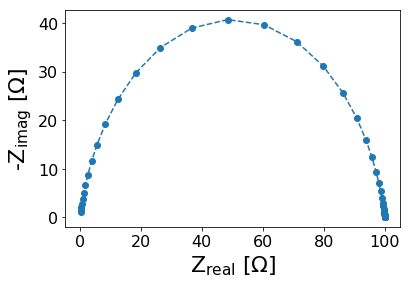

In [5]:
fig = plt.figure()
plt.plot(RQ_example1.real, -RQ_example1.imag, 'o--')

plt.xlabel('Z$_{real}$ [$\Omega$]')
plt.ylabel('-Z$_{imag}$ [$\Omega$]')

Similar procedure can be called for all other cir_() functions, however there is a better way of illustrating and simulating EIS spectras by using the EIS_sim() function

## The EIS_sim() Function

To increase the ease of simulation and plotting, the above method of simulating is rather brute-force but illustrates the core conectps of the software. However, EIS_sim() simplified the plotting of the spectra

In [6]:
#EIS_sim(circuit, frange, bode, nyq_xlim, nyq_ylim, legend, savefig)

EIS_sim() uses the circuit functions to simulate and plot any circuit in one line of code. As an example the RQ circuit from before can be plottet

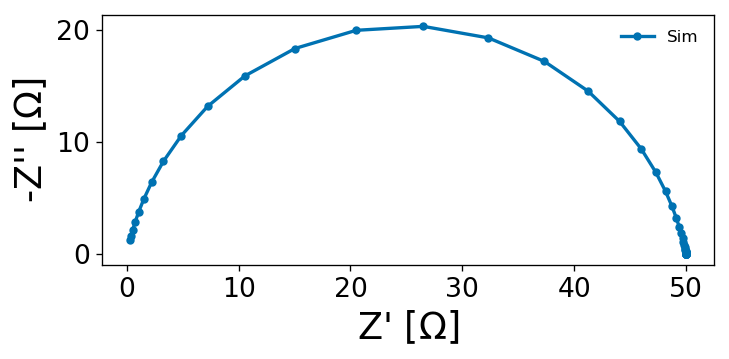

In [7]:
RQ_example2 = EIS_sim(frange=f_range[0], circuit=cir_RQ(w=f_range[1], R=50, n=.87, Q=10**-6))

### Bode plots

This process makes for rapid simulations, as the circuit is both simulated and illustrated simutaniously. EIS_sim() has a number of features that makes it more usefull, in particular the bode function that can be turned on to display the Bode plot of the simulated circuit. The bode function has seven different possibilities:
- 'off' = (default)
- 'on' = displays both the real and imaginary parts vs. log(f)
- 're' = displays the real part vs. log(f)
- 'log_re' = displays log(real) vs. log(f)
- 'im' = displays the imaginary part vs. log(f)
- 'log_im' = displays log(imaginary) part vs. log(f)
- 'log' = displays both the log(real) and log(imaginary) parts vs. log(f)

Note that default is bode = 'off'. In the following six plots, the different Bode plots are illustrated for the simulate RQ circuit

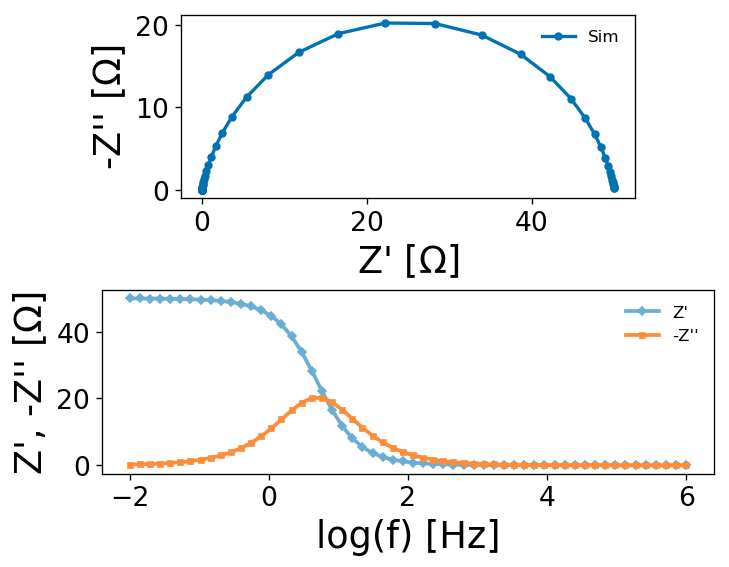

In [8]:
RQ_example2 = EIS_sim(frange=f_range[0], circuit=cir_RQ(w=f_range[1], R=50, n=.87, Q=10**-3), bode='on')

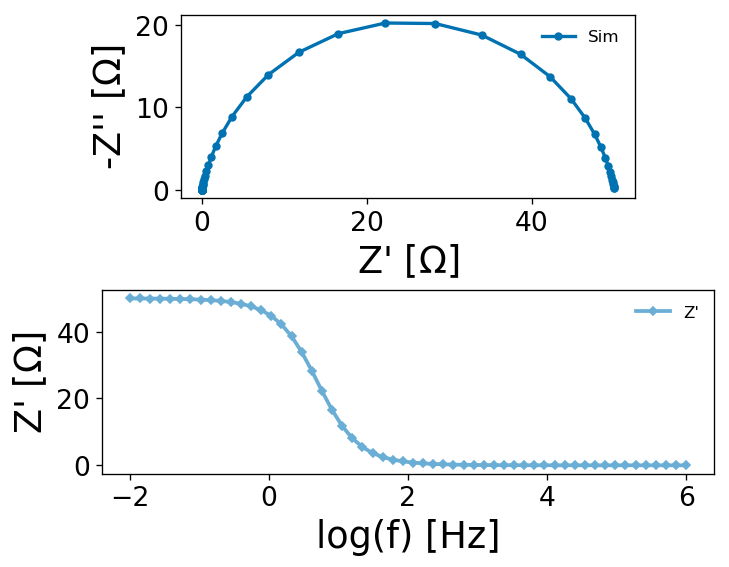

In [9]:
RQ_example2 = EIS_sim(frange=f_range[0], circuit=cir_RQ(w=f_range[1], R=50, n=.87, Q=10**-3), bode='re')

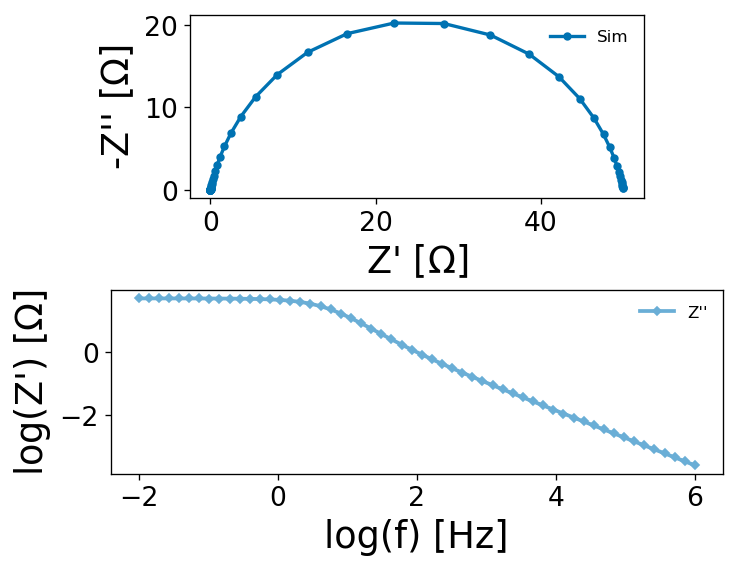

In [10]:
RQ_example2 = EIS_sim(frange=f_range[0], circuit=cir_RQ(w=f_range[1], R=50, n=.87, Q=10**-3), bode='log_re')

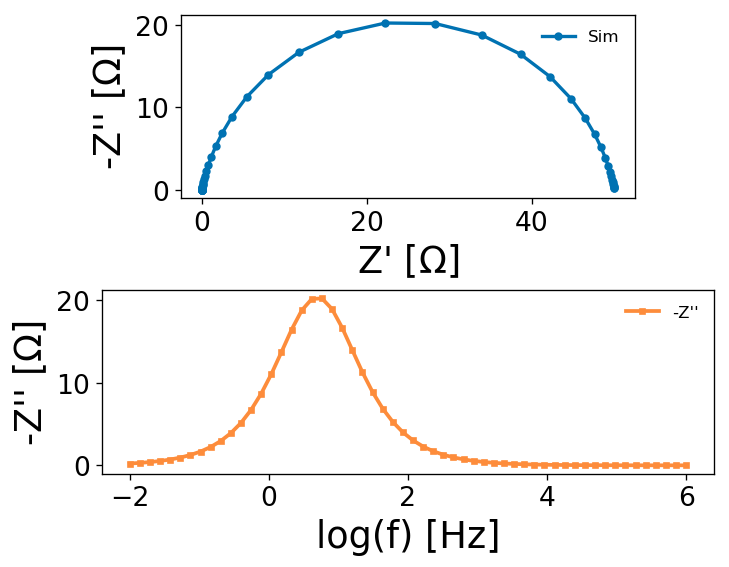

In [11]:
RQ_example2 = EIS_sim(frange=f_range[0], circuit=cir_RQ(w=f_range[1], R=50, n=.87, Q=10**-3), bode='im')

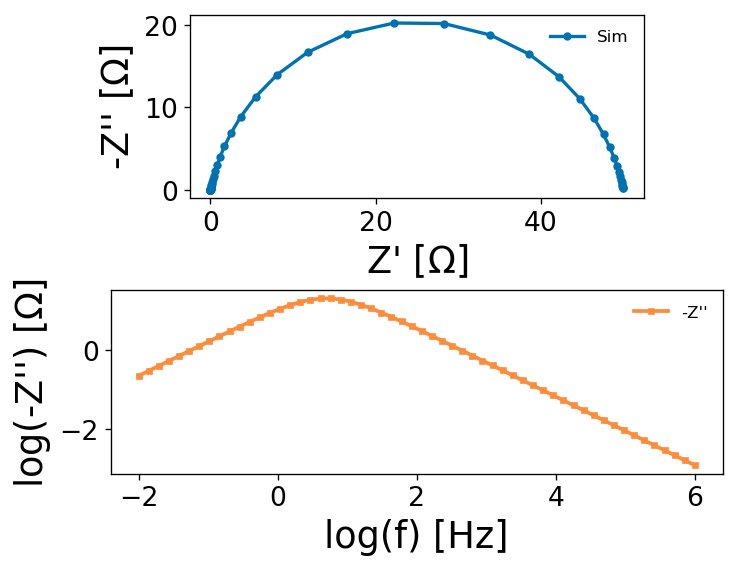

In [12]:
RQ_example2 = EIS_sim(frange=f_range[0], circuit=cir_RQ(w=f_range[1], R=50, n=.87, Q=10**-3), bode='log_im')

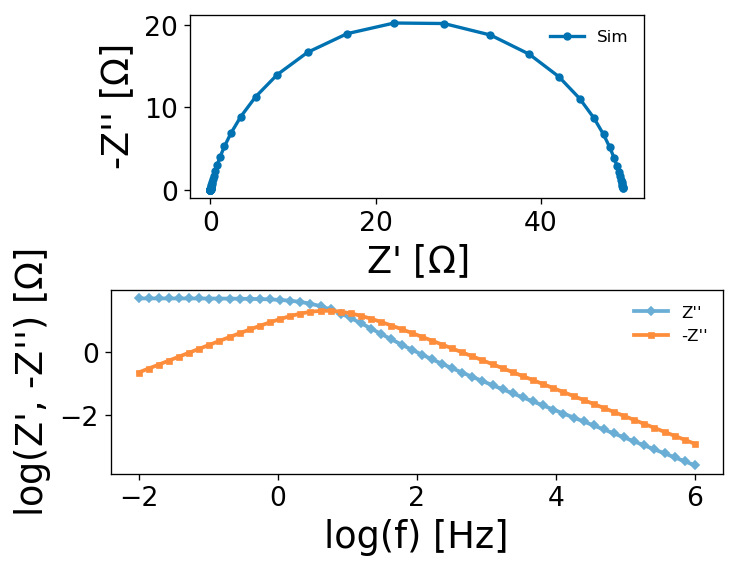

In [13]:
RQ_example2 = EIS_sim(frange=f_range[0], circuit=cir_RQ(w=f_range[1], R=50, n=.87, Q=10**-3), bode='log')

### Scale of Nyquist plot 
The Nyquist plot is always displayed with an aspect ratio that is equal, this allows for a visual inspection of the data, as one hereby can acess the ideality of e.g. a semi-circle or a 45$^o$ angle for a classical Warburg element. However sometimes the aspect ratio, can make it difficuilt to display the data. EIS_sim() therefore has the two functions: nyq_xlim() and nyq_ylim() that allows the user to magnify the Nyquist plot.

Each function requires two inputs separated with "," a lower and an upper bound. As an example:

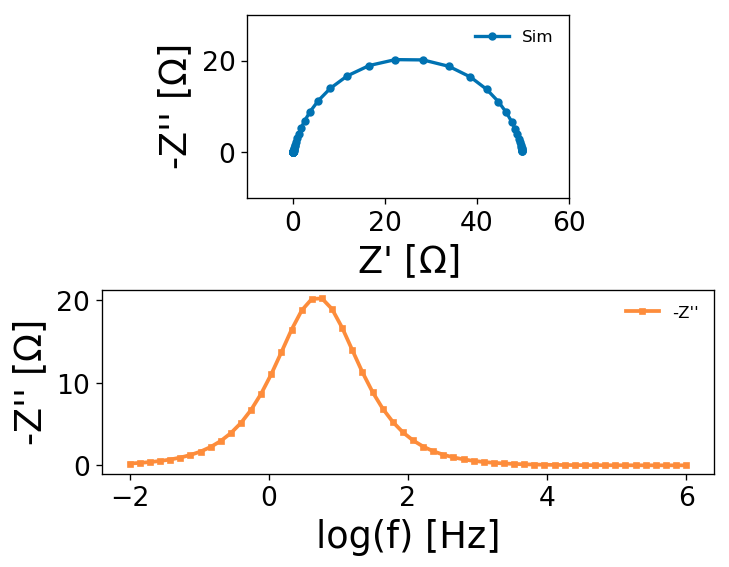

In [14]:
RQ_example2 = EIS_sim(frange=f_range[0], circuit=cir_RQ(w=f_range[1], R=50, n=.87, Q=10**-3), bode='im', nyq_xlim=(-10,60), nyq_ylim=(-10,30))

### Figure Legends
Legends can be useful to illustrate data, however if multiple spectras are simulated they might become a nuisance, EIS_sim() has a legend() function implemented. The default value is 'on', but can be turned 'off' as illustrated

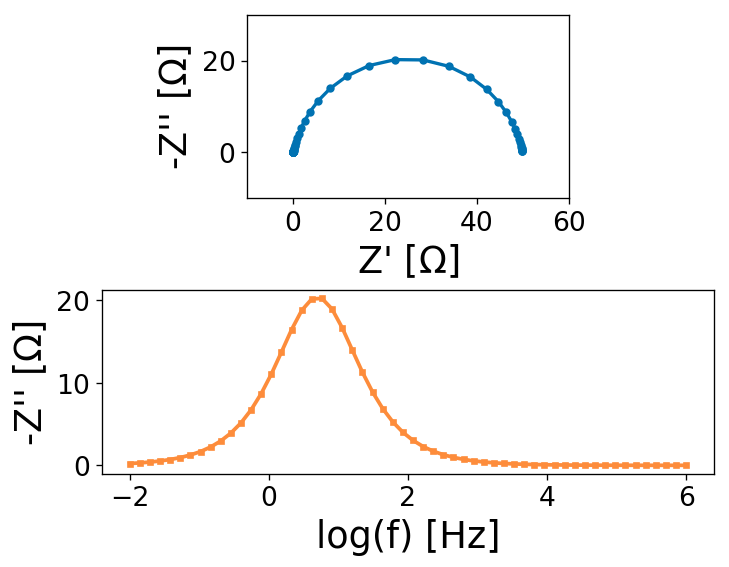

In [15]:
RQ_example2 = EIS_sim(frange=f_range[0], circuit=cir_RQ(w=f_range[1], R=50, n=.87, Q=10**-3), bode='im', nyq_xlim=(-10,60), nyq_ylim=(-10,30), legend='off')

### Save figure
To save any figure made with the EIS_sim(), use the build-in savefig() function. It based on __[Matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html)__ and can therefore be saved using most backends, i.e. '.png', '.pdf', '.ps', '.eps', and '.svg'. This figure will be saved in the same location as your notebook and with a dpi of 120.

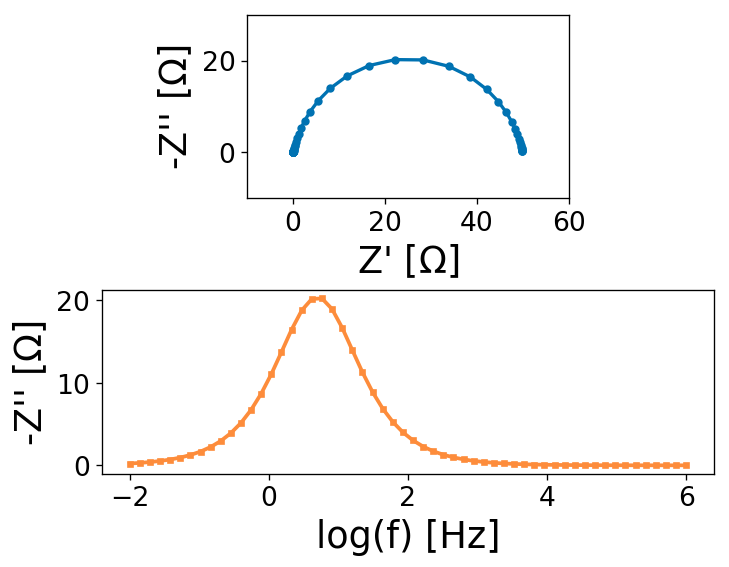

In [16]:
RQ_example2 = EIS_sim(frange=f_range[0], circuit=cir_RQ(w=f_range[1], R=50, n=.87, Q=10**-3), bode='im', nyq_xlim=(-10,60), nyq_ylim=(-10,30), legend='off', savefig='RQ example.png')

# Simulating other circuits
In the same manner as illustrated with the RQ circuit all other equivalent circuits included in the software can be simulated using EIS_sim(), the following section will cover simulations of each circuit

## Simulation of -(RC)-

<img src='pyEIS_images/RC_circuit.png' width=300>

#### Input Parameters:
- w = Angular frequency [1/s]
- R = Resistance [Ohm]
- C = Capacitance [F]
- fs = summit frequency of RC circuit [Hz]

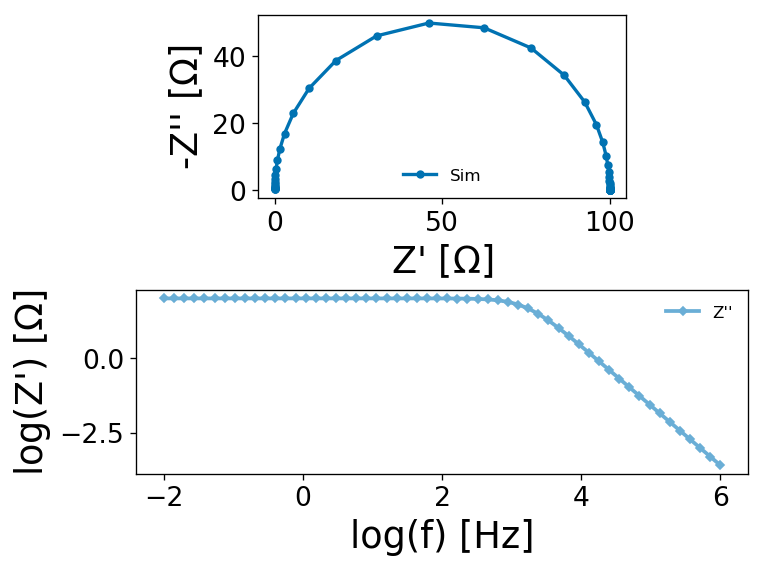

In [17]:
RC_example = EIS_sim(frange=f_range[0], circuit=cir_RC(w=f_range[1], R=100, C=10**-6), bode='log_re', legend='on')

## Simulation of -Rs-(RQ)-

<img src='pyEIS_images/RsRQ_circuit.png' width=500>

#### Input parameters:
- w = Angular frequency [1/s]
- Rs = Series resistance [Ohm]
- R = Resistance [Ohm]
- Q = Constant phase element [s^n/ohm]
- n = Constant phase elelment exponent [-]
- fs = summit frequency of RQ circuit [Hz]

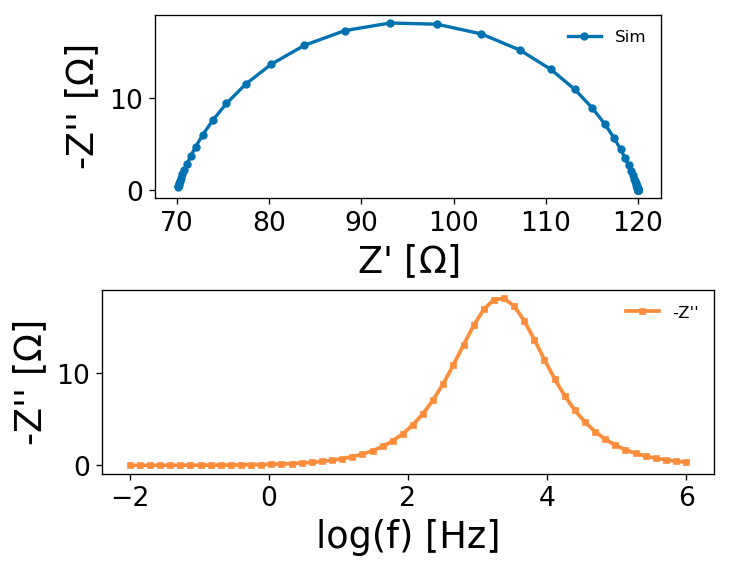

In [18]:
RsRQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQ(w=f_range[1], Rs=70, R=50, n=.8, Q=10**-5), bode='im', legend='on')

## Simulation of -Rs-(RQ)-(RQ)-

<img src='pyEIS_images/RsRQRQ_circuit.png' width=500>

#### Input parameters:
- w = Angular frequency [1/s]
- Rs = Series Resistance [Ohm]
- R = Resistance [Ohm]
- Q = Constant phase element [s^n/ohm]
- n = Constant phase element exponent [-]
- fs = summit frequency of RQ circuit [Hz]
- R2 = Resistance [Ohm]
- Q2 = Constant phase element [s^n/ohm]
- n2 = Constant phase element exponent [-]
- fs2 = summit frequency of RQ circuit [Hz]

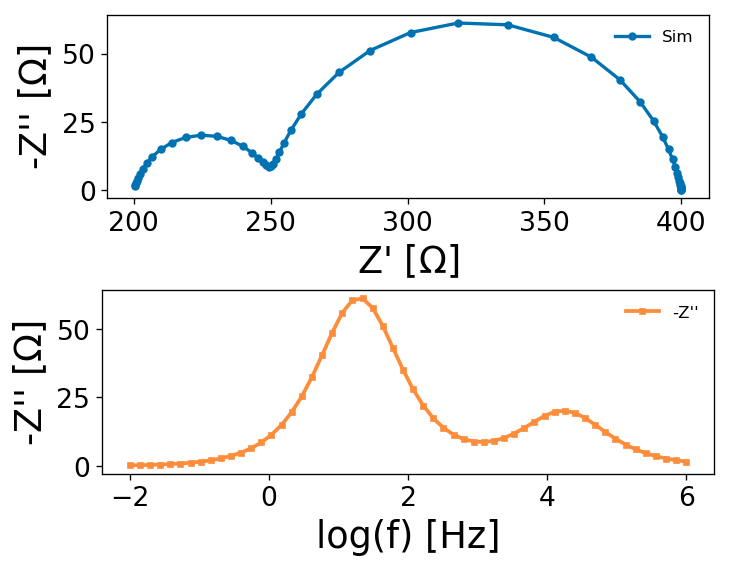

In [19]:
RsRQRQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQRQ(w=f_range[1], Rs=200, R=150, n=.872, Q=10**-4, R2=50, n2=.853, Q2=10**-6), bode='im', legend='on')

## Simulation of -Q- (Constant-phase-element)

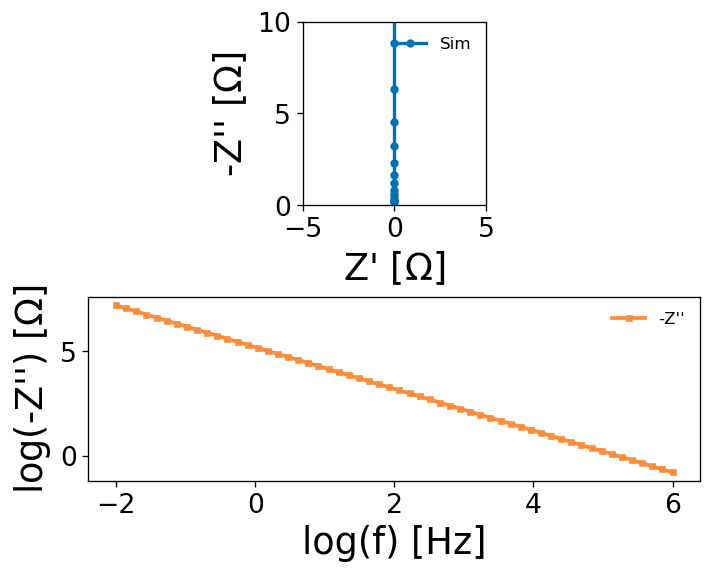

In [20]:
Q_example = EIS_sim(frange=f_range[0], circuit=elem_Q(w=f_range[1], Q=10**-6, n=1), bode='log_im', legend='on', nyq_xlim=[-5,5], nyq_ylim=[0,10])

## Simulation of -Rs-Q- (Blocking electrodes)

#### Input parameters
- w = Angular frequency [1/s]
- Rs = Series Resistance [ohm]
- Q = Constant phase element [s^n/ohm]
- n = Constant phase elelment exponent [-]

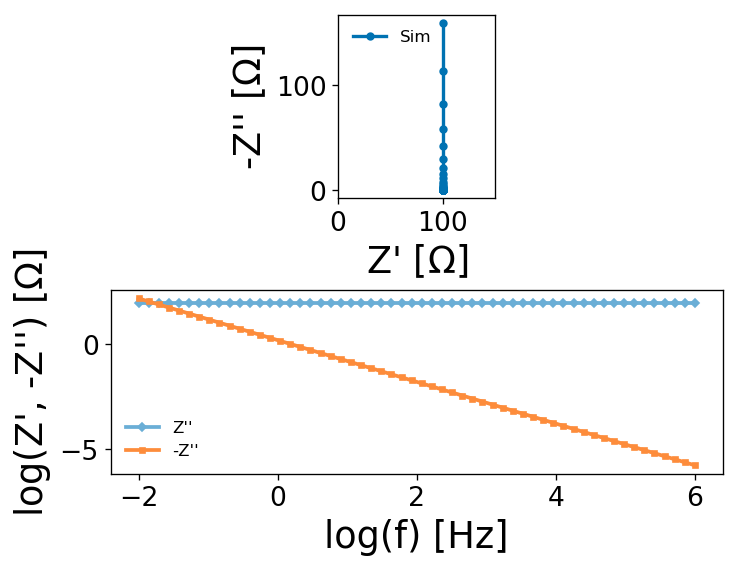

In [21]:
RsQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsQ(w=f_range[1], Rs=100, Q=10**-1, n=1), bode='log', legend='on', nyq_xlim=[0,150])#, nyq_ylim=[0,10])

## Simulation of -Rs-RQ-Q

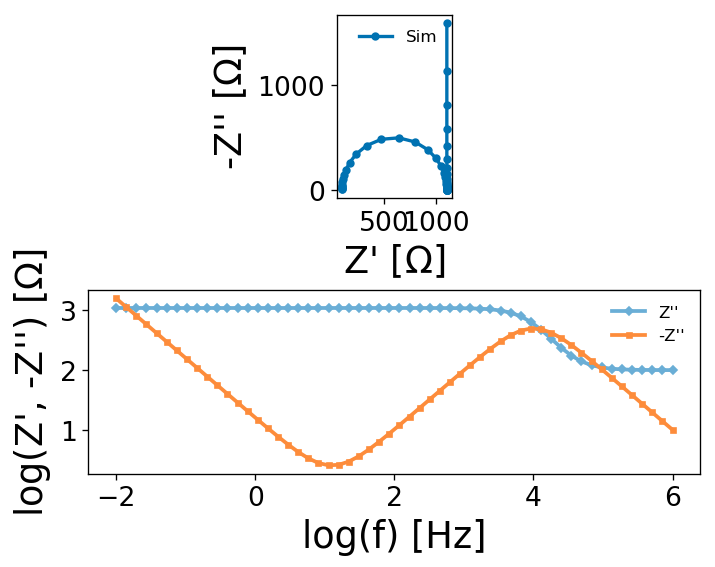

In [22]:
RsRQQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQQ(w=f_range[1], Rs=100, Q=10**-2, n=1, R1=1000, Q1='none', n1=1, fs1=10**4), bode='log', legend='on')

## Simulation of -Rs-(Q(RW))- (Randles-circuit)
This circuit is often used for an experimental setup with a macrodisk working electrode with an outer-sphere heterogeneous charge transfer. This, classical, warburg element is controlled by semi-infinite linear diffusion, which is given by the geometry of the working electrode. Two Randles functions are avaliable for simulations: cir_Randles_simplified() and cir_Randles(). The former contains the Warburg constant (sigma), which summs up all mass transport constants (Dox/Dred, Cred/Cox, number of electrons (n_electron), Faradays constant (F), T, and E0) into a single constant sigma, while the latter contains all of these constants. Only cir_Randles_simplified() is avaliable for fitting, as either D$_{ox}$ or D$_{red}$ and C$_{red}$ or C$_{ox}$ are needed.

<img src='pyEIS_images/Randles_circuit.png' width=500>

#### Input parameters:
- Rs = Series resistance [ohm]
- Rct = charge-transfer resistance [ohm]
- Q = Constant phase element used to model the double-layer capacitance [F]
- n = expononent of the CPE [-]
- sigma = Warburg Constant [ohm/s^1/2]

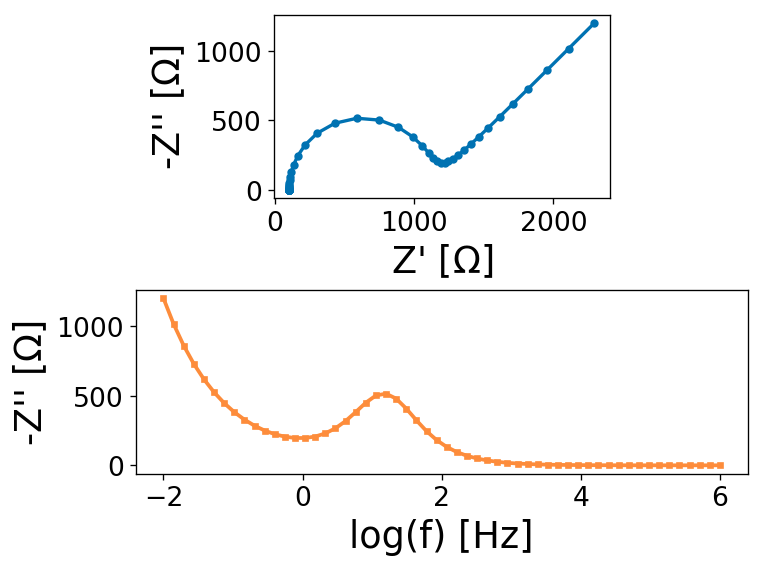

In [23]:
Randles = cir_Randles_simplified(w=f_range[1], Rs=100, R=1000, n=1, sigma=300, Q=10**-5)
Randles_example = EIS_sim(frange=f_range[0], circuit=Randles, bode='im', legend='off')

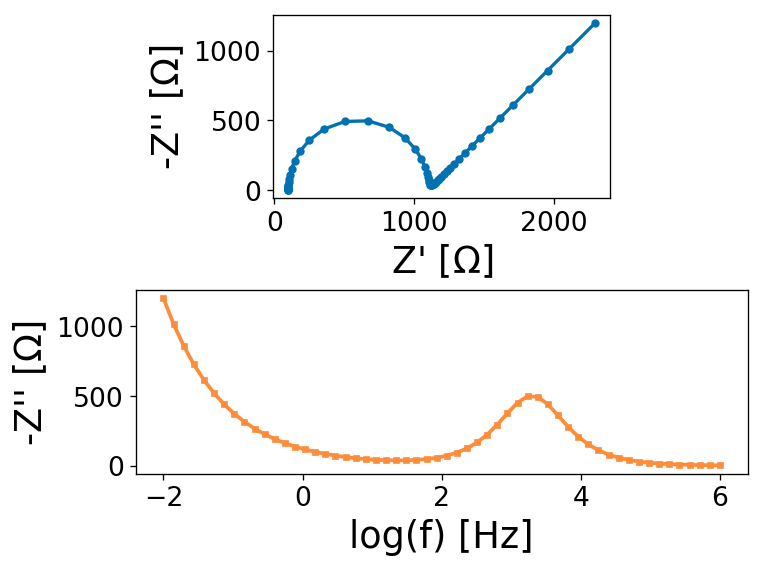

In [24]:
Randles_example = EIS_sim(frange=f_range[0], circuit=cir_Randles_simplified(w=f_range[1], Rs=100, R=1000, n=1, sigma=300, Q='none', fs=10**3.3), bode='im', legend='off')

In the following, the Randles circuit with the Warburg constant (sigma) defined is simulated where:
- D$_{red}$/D$_{ox}$ = 10$^{-6}$ cm$^2$/s
- C$_{red}$/C$_{ox}$ = 10 mM
- n_electron = 1
- T = 25 $^o$C

This function is a great tool to simulate expected impedance responses prior to starting experiments as it allows for evaluation of concentrations, diffusion constants, number of electrons, and Temp. to evaluate the feasability of obtaining information on either kinetics, mass-transport, or both.

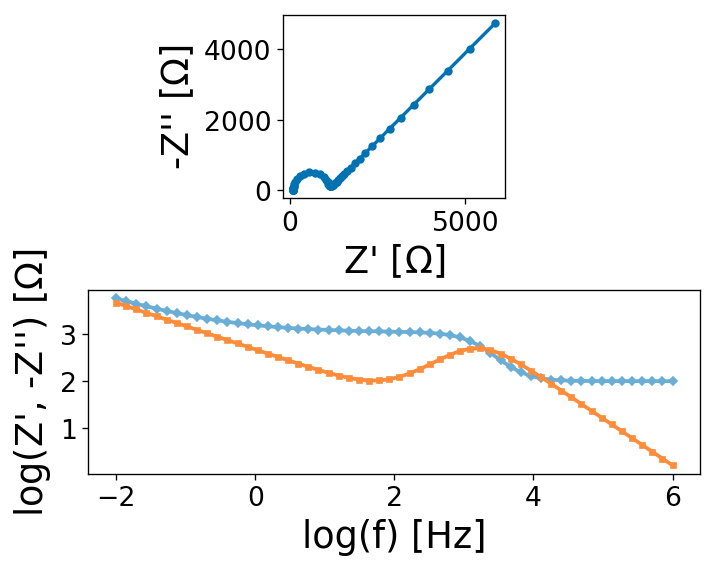

In [25]:
Randles_example = EIS_sim(frange=f_range[0], circuit=cir_Randles(w=f_range[1], Rs=100, Rct=1000, Q=10**-7, n=1, T=298.15, D_ox=10**-9, D_red=10**-9, C_ox=10**-5, C_red=10**-5, n_electron=1, E=0, A=1), bode='log', legend='off')

This circuit is however still simplified, as the concentrations (C$_{red}$/C$_{ox}$) in the previous definition are bulk concentraions. The acutal C$_{red}$/C$_{ox}$ values that influnce the impedance are the surface concentrations (C$_{red/ox}$(0,t)).

For a reduction with ne$^-$ where:

Ox + ne$^-$ -> red.

The concentrations for a potential step is given by Nernst equations following the mass transport that is governed by a semi-infinite linear diffusion [1-2]. The following equations can be used

#### $C_{ox}(0, t) = C_{ox}^* \cdot \Big[ \frac{\varsigma \theta}{1+ \varsigma \theta} \Big]$

#### $C_{red}(0, t) = C_{ox}^* \cdot \Big[ \frac{\varsigma}{1+\varsigma \theta} \Big]$

where

#### $\varsigma = \Big( \frac{D_{ox}}{D_{red}} \Big)^{1/2} = [-]$

#### $\theta = \frac{C_{ox}(0,t)}{C_{red}(0,t)} = \exp \Big[ \frac{nF (E-E^{0'})}{RT} \Big] = [-]$

This function is incorported in PyEIS as C_redox_Estep_semiinfinite(E, E0, n, C_ox, D_ox, D_red, T). The change in surface concentrations of C$_{ox}$/C$_{red}$ as a function of potential at a macrodisk electrode for the previous mentioned system is illustrated in the following figure.

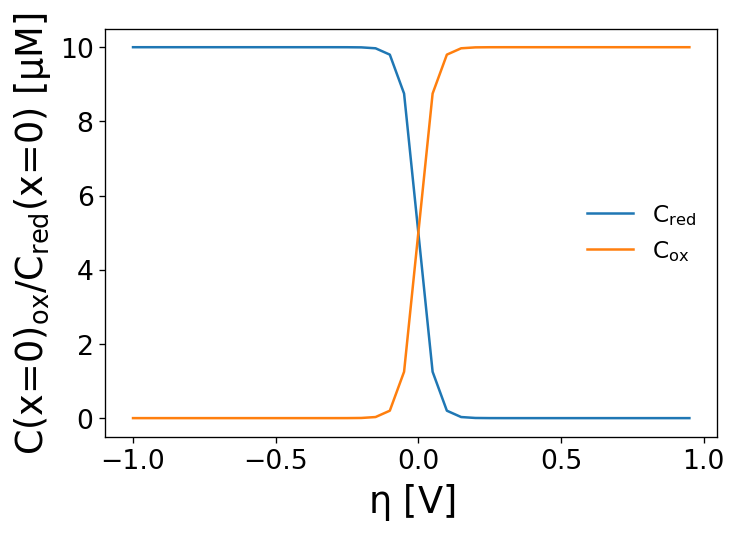

In [26]:
Evalues = np.arange(-1, 1, 0.05)
C_redox = C_redox_Estep_semiinfinite(E=Evalues, E0=0, n=1, C_ox=10**-5, D_ox=10**-9, D_red=10**-9, T=298.15)

fig = figure(dpi=120, facecolor='w', edgecolor='w')
fig.subplots_adjust(left=0.1, right=0.95, hspace=0.5, bottom=0.1, top=0.95)
ax = fig.add_subplot(111)

ax.plot(Evalues, C_redox[0]*10**6, label='C$_{red}$')
ax.plot(Evalues, C_redox[1]*10**6, label='C$_{ox}$')

ax.set_xlabel('$\eta$ [V]')
ax.set_ylabel('C(x=0)$_{ox}$/C$_{red}$(x=0) [$\mu M$]')
ax.legend(loc=5, frameon=False)

The mass transport limtations, which are controlled by the Warburg constant are therefore highly dependent on the overpotential. These surface concentrations effects are also incorporated in the cir_Randles() function, and can be activated by setting C_red and C_ox = 'none' and instead defining E and E0. To illustrate the dependency on the impedance of the surface concentrations, two examples are given: -50 mV and -100 mV

#### $\eta = -50 mV$

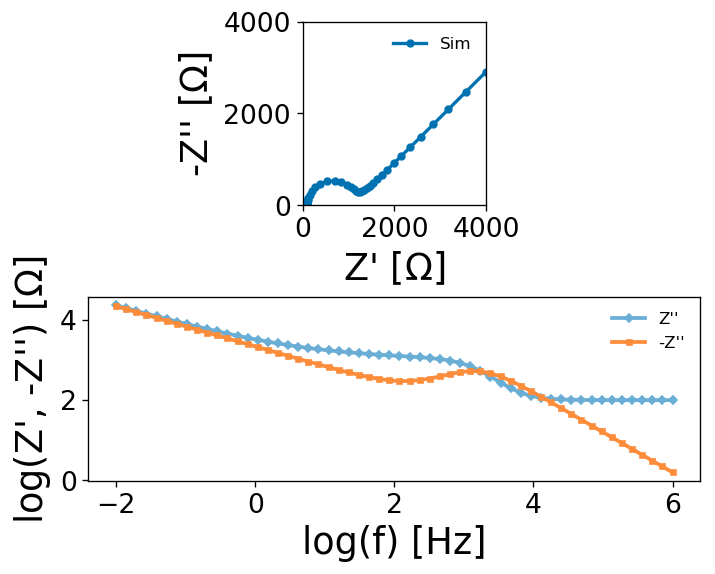

In [27]:
Randles_example = EIS_sim(frange=f_range[0], circuit=cir_Randles(w=f_range[1], Rs=100, Rct=1000, Q=10**-7, n=1, T=298.15, D_ox=10**-9, D_red='none', C_ox=10**-5, C_red='none', n_electron=1, E=-.05, A=1), bode='log', legend='on', nyq_xlim=[0,4000], nyq_ylim=[0,4000])

#### $\eta = -100 mV$

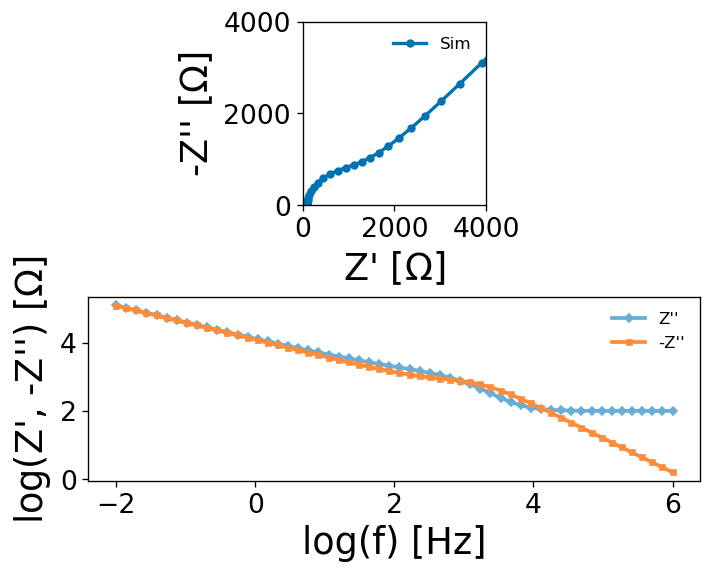

In [28]:
Randles_example = EIS_sim(frange=f_range[0], circuit=cir_Randles(w=f_range[1], Rs=100, Rct=1000, Q=10**-7, n=1, A=1, T=298.15, D_ox=10**-9, D_red='none', C_ox=10**-5, C_red='none', n_electron=1, E=-.1, E0=0), bode='log', legend='on', nyq_xlim=[0,4000], nyq_ylim=[0,4000])

As illustrated with the two Randles simulations, the surface concentrations highly impact the mass transport part of the impedance, and when the concentration of the reactant (C$_{ox}$) becomes low the Warburg element begins to overlap with the time constant of the heterogeneous charge transfer, i.e. the semicircle (-(RQ)- circuit). This will occur even more so when the impact of surface conctration is included on in the terms for charge-transfer resistance (here assumend to be indepedent and constant as a function of overpotential for illustration purposes).

## Simulation of -C$_e$-(RC)$_b$-C$_e$-

This circuit has traditionally been used to study polymer electrolytes at blocking electrodes, usually Al current collectors as illustrated by the interfacial capacitance (C$_e$). The solution conductivity is modeled by the traditional resistance, which in other circuits is desribed as R$_s$, but here as R$_b$ (bulk), but also includes as capacitor in paralell that represents the immobalized charge on the polymer chain [3].

<img src='pyEIS_images/C_RC_C_circuit.png' width=500>

#### Input parameters:
- w = Angular frequency [1/s]
- Ce = Interfacial capacitance [F]
- Rb = Bulk/series resistance [Ohm]
- Cb = Bulk capacitance [F]

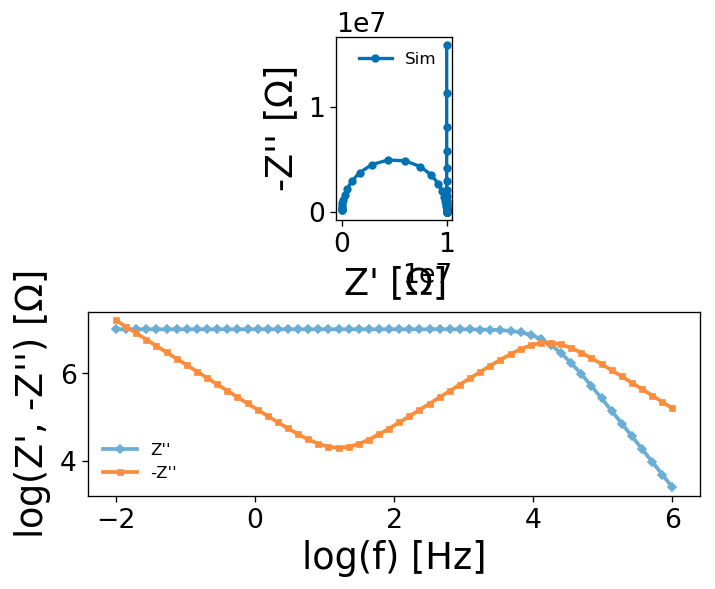

In [29]:
C_RC_C_example = EIS_sim(frange=f_range[0], circuit=cir_C_RC_C(w=f_range[1], Ce=10**-6, Cb=10**-12, Rb=10**7, fsb='none'), bode='log')

## Simulation of -Q$_e$-(RQ)$_b$-Q$_e$-

Similar to the previous circuit where the interfacial- and bulk capatiance is described by the non-ideal constant phase elements Q$_e$ and Q$_b$, respectively.

<img src='pyEIS_images/Q_RQ_Q_circuit.png' width=500>

#### Input parameters:
- w = Angular frequency [1/s]
- Qe = Interfacial capacitance modeled with a CPE [F]
- ne = Interfacial constant phase element exponent [-]
- Rb = Bulk/series resistance [Ohm]
- Qb = Bulk capacitance modeled with a CPE [s^n/ohm]
- nb = Bulk constant phase element exponent [-]
- fsb = summit frequency of bulk (RQ) circuit [Hz]

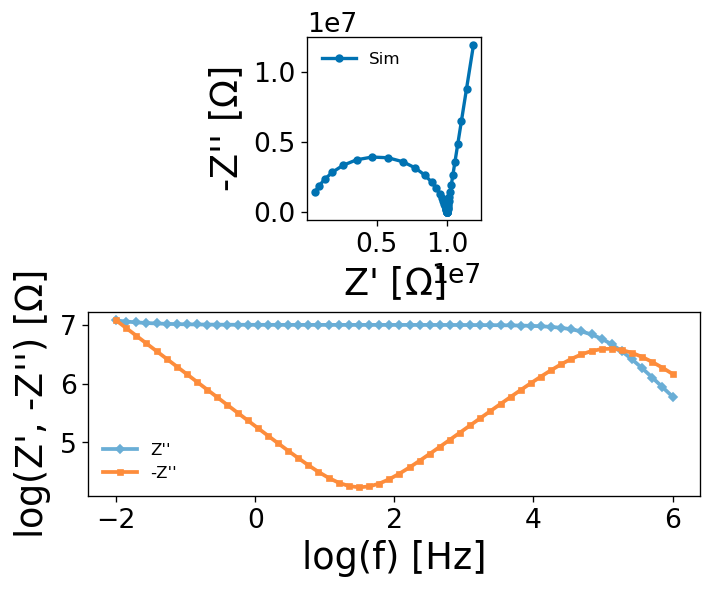

In [30]:
Q_RQ_Q_example = EIS_sim(frange=f_range[0], circuit=cir_Q_RQ_Q(w=f_range[1], Qe=10**-6, ne=.9, Qb=10**-12, Rb=10**7, fsb='none', nb=.85), bode='log')

## Simulation of -Rs-(RC)$_b$-(RC)$_e$-Z$_D$-

This circuit has previously been used to study mixtures of ionically conducting polymers and salts at reacting electrodes. Here one of the salts, e.g. Li$^+$, is reduced at the electrode/electrolyte interface and diffuses away, the circuit therefore includes terms for the bulk (RC)$_b$, where the C$_b$ is charge contribtion of the immobalized polymeric ionc, (RC)$_e$, which is related to the redox of the reactive salt ion and Z$_D$, which is the mass transport term of that ion [3,4].

<img src='pyEIS_images/RCRCZD_circuit.png' width=500>

#### Input parameters:
- w = Angular frequency [1/s]
- L = Thickness of electrode [cm]
- D_s = Diffusion coefficient of dissolved salt [cm2/s]
- u1 = mobility of the ion reacting at the electrode interface
- u2 = mobility of the other ion
- Re = Interfacial resistance [Ohm]
- Ce = Interfacial  capacitance [F]
- fse = summit frequency of the interfacial (RC) circuit [Hz]
- Rb = Bulk/series resistance [Ohm]
- Cb = Bulk capacitance [F]
- fsb = summit frequency of the bulk (RC) circuit [Hz]

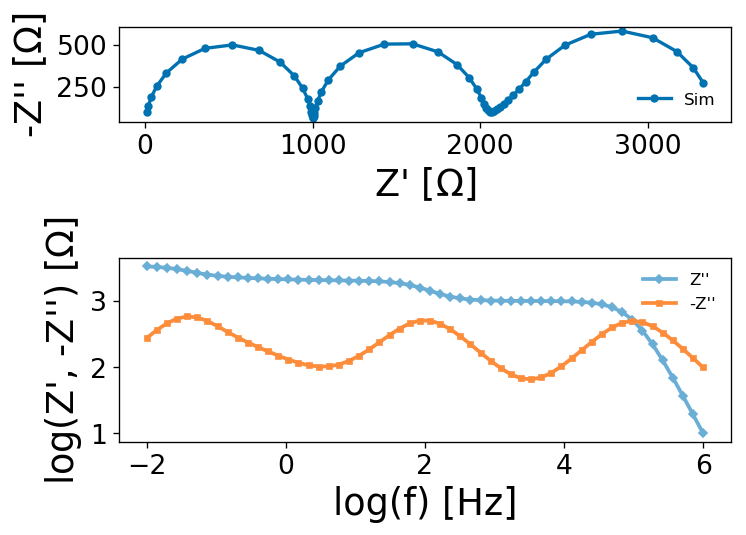

In [31]:
RCRCZD_example = EIS_sim(frange=f_range[0], circuit=cir_RCRCZD(w=f_range[1], L=10**-2, D_s=10**-5, u1=.5*10**-5, u2=.7*10**-5, Cb='none', Rb=10**3, fsb=10**5, Ce='none', Re=10**3, fse=10**2), bode='log')

## Simulation of -Rs-TLsQ-
The Simplified Transmission Line model with blocking interface. This circuits models a porous electrode assuming all pores can be modelded as a single cylinderic pore. The simplified version assumes that the conductivity of the electrode is much greater that the conducitivy of the electrolyte-filled pores, i.e. Ri (ionic resistance) >> Rel (electrode resistance) and ignores concentration gradients through the porous electrode. The interfacial impedance, inside the pores, can be modelded with different circuits depending on the electrochemical conditions, and the following examples will cover a few of these. TLsQ assumes an interfacial impedance with a constant-phase element, i.e. a blocking interface. Note that some of these input paramters are defined per pore length [5-7].

<img src='pyEIS_images/RsTLsQ_circuit.png' width=500>

#### Input parameters:
- Rs = Series resistance [ohm]
- L = Length/Thickness of porous electrode [cm]
- Ri = Ionic resistance inside of flodded pores [ohm/cm]
- Q = Interfacial capacitance of non-faradaic interface [F/cm]
- n = exponent for the interfacial capacitance [-]

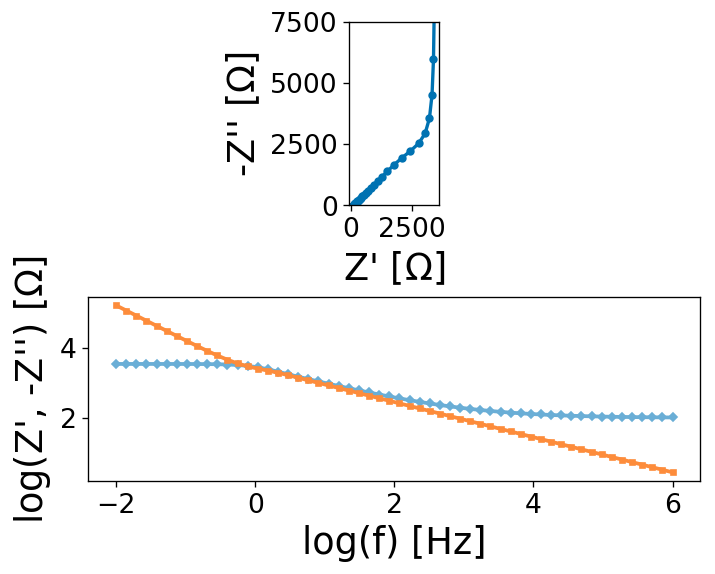

In [32]:
TLsQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsTLsQ(w=f_range[1], Rs=100, L=100, Ri=100, Q=10**-6, n=1), bode='log', legend='off', nyq_ylim=[0,7500])

## Simulation of -Rs-(RQ)-TLsQ-
This circuits is similar to the above, with an added -(RQ)- circuit. This circuit has previously shown to be useful for two electrode cell were the opposite electrode can be understood simply as a reacting interface without porosity, or in cases were the current collector behind the porous electrode contribute the to impedance response [5-7].

<img src='pyEIS_images/RsRQTLsQ_circuit.png' width=500>

#### Input parameters:
- Rs = Series resistance [ohm]
- R1 = Charge transfer resistance of RQ circuit [ohm]
- fs1 = Summit frequency for RQ circuit [Hz]
- n1 = exponent for RQ circuit [-]
- Q1 = constant phase element of RQ circuit [s^n/ohm]
- L = Length/Thickness of porous electrode [cm]
- Ri = Ionic resistance inside of flodded pores [ohm/cm]
- Q = Interfacial capacitance of non-faradaic interface [F/cm]
- n = exponent for the interfacial capacitance [-]

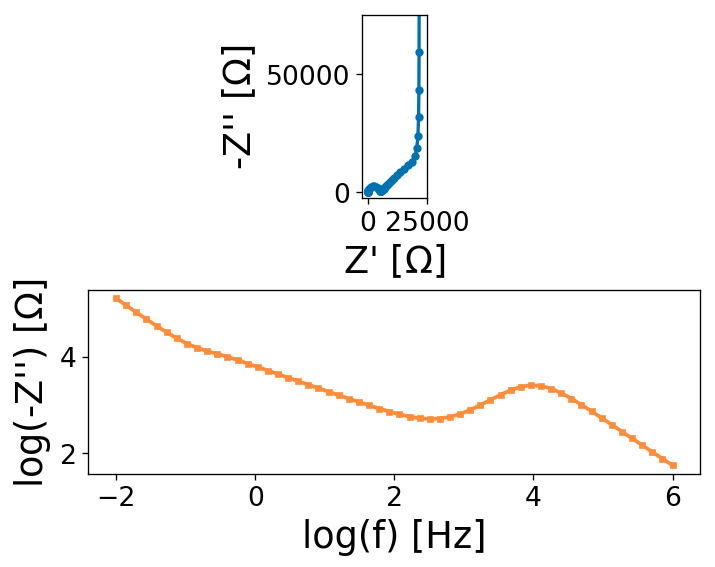

In [33]:
RsRQTLSQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQTLsQ(w=f_range[1], Rs=100, R1=5000, fs1=10000, n1=1, L=10, Ri=5000, Q=10**-5, n=1), bode='log_im', legend='off', nyq_xlim=[-2500,25000], nyq_ylim=[-2500,75000])

## Simulation of -Rs-TLs-
Simular to the Rs-TLsQ, this circuit assumes all pores can be summarized as a single cylinderic pore and ignores concentration and voltage gradients. However this circuit has a non-blocking or reacting interface, which is modelded by an -(RQ)- circuit inside of the pores [5-7].

<img src='pyEIS_images/RsTLs_circuit.png' width=500>

#### Input paramters:
- Rs = Series resistance [ohm]
- L = Length/Thickness of porous electrode [cm]
- Ri = Ionic resistance inside of flodded pores [ohm/cm]
- R = Interfacial Charge transfer resistance [ohm*cm]
- fs = Summit frequency of interfacial RQ circuit [Hz]
- n = exponent for interfacial RQ circuit [-]
- Q = Constant phase element of interfacial capacitance [s^n/Ohm] 

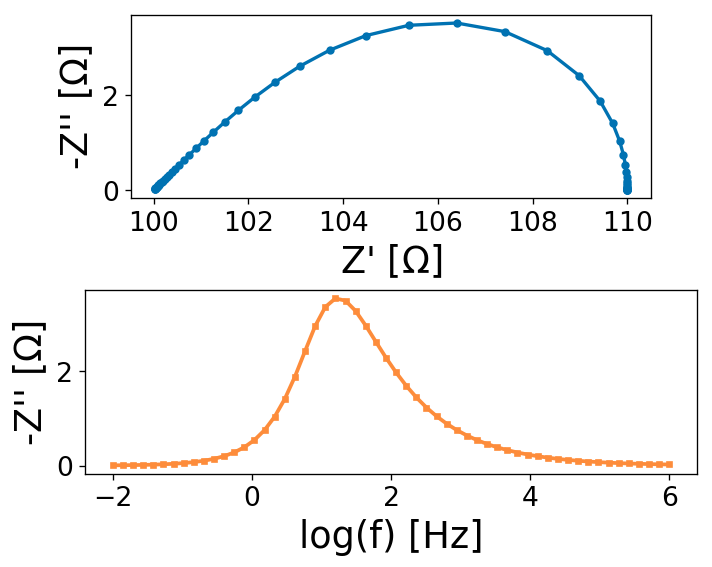

In [34]:
RsTLs_example = EIS_sim(frange=f_range[0], circuit=cir_RsTLs(w=f_range[1], Rs=100, L=1, Ri=100, R=1, n=1, fs=10), bode='im', legend='off')

## Simulation of -Rs-(RQ)-TLs-
This circuit is similar to Rs-TQ-TLsQ, where the interfacial impedance of porous electrodes is a (non-blocking), i.e. reacting interface modleded with a -(RQ)- circuit [5-7].

<img src='pyEIS_images/RsRQTLs_circuit.png' width=500>

#### Input paramters:
- Rs = Series resistance [ohm]
- R1 = Charge transfer resistance of RQ circuit [ohm]
- fs1 = Summit frequency for RQ circuit [Hz]
- n1 = exponent for RQ circuit [-]
- Q1 = constant phase element of RQ circuit [s^n/ohm] 
- L = Length/Thickness of porous electrode [cm]
- Ri = Ionic resistance inside of flodded pores [ohm/cm]
- R2 = Interfacial Charge transfer resistance [ohm*cm]
- fs2 = Summit frequency of interfacial RQ circuit [Hz]
- n2 = exponent for interfacial RQ circuit [-]
- Q2 = Constant phase element of interfacial capacitance [s^n/Ohm] 

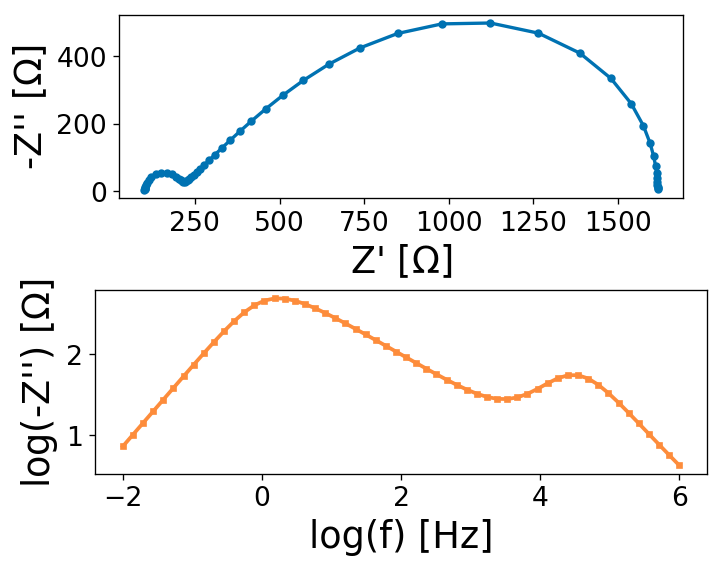

In [35]:
RsRQTLs_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQTLs(w=f_range[1], Rs=100, L=1, Ri=5000, R1=100, n1=1, fs1=10**4.5, R2=400, n2=1, fs2=1, Q1='none', Q2='none'), bode='log_im', legend='off')

## Simulation of -Rs-TLQ-

This circuit includes the full comlexity of De Levie and Dalahays transmission line, where Rel is the electronic resistance of the electrodes and Ri is the ionic restiance within the flodded pores of the electrode [12]. Similar to the simplified transmission line TLs, this circuit can have different interfacial behaviors, this circuit -Rs-TLQ-, assums a blocking electrodes represented by the constant phase element [5-7].

<img src='pyEIS_images/RsTLQ_circuit.png' width=500>
    
#### Input parameters:
- Rs = Series resistance [ohm]
- Q = Constant phase element for the interfacial capacitance [s^n/ohm]        
- n = exponenet for interfacial RQ element [-]
- Rel = electronic resistance of electrode [ohm/cm]
- Ri = Ionic resistance inside of flodded pores [ohm/cm]
- L = thickness of porous electrode [cm]

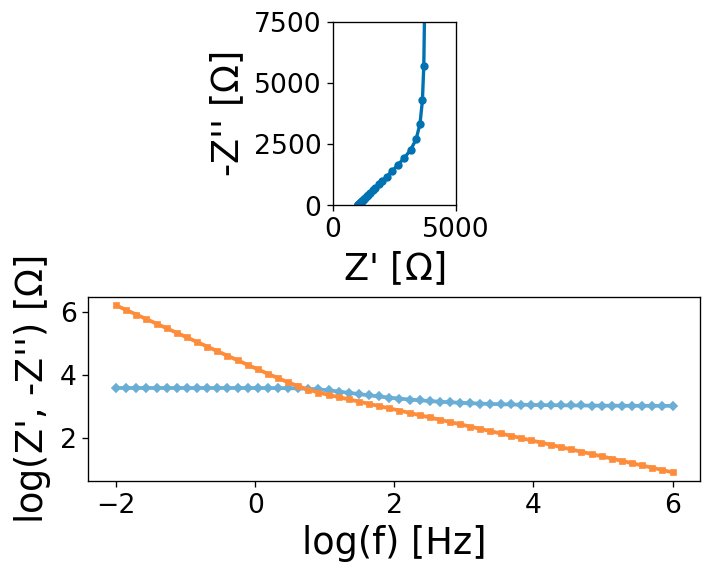

In [36]:
RsTLQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsTLQ(w=f_range[1], L=100, Rs=100, Q=10**-7, n=1, Rel=10, Ri=100), bode='log', legend='off', nyq_xlim=[0,5000], nyq_ylim=[0,7500])

## Simulation of -Rs-(RQ)-TLQ-

Similar to the previous circuit with a at -(RQ)- circuit in series [5-7].

<img src='pyEIS_images/RsRQTLQ_circuit.png' width=500>

#### Input parameters:
- Rs = Series resistance [ohm]
- R1 = Charge transfer resistance of RQ circuit [ohm]
- fs1 = Summit frequency for RQ circuit [Hz]
- n1 = exponent for RQ circuit [-]
- Q1 = constant phase element of RQ circuit [s^n/(ohm * cm)]
- Q = Constant phase element for the interfacial capacitance [s^n/ohm]        
- n = exponenet for interfacial RQ element [-]
- Rel = electronic resistance of electrode [ohm/cm]
- Ri = Ionic resistance inside of flodded pores [ohm/cm]
- L = thickness of porous electrode [cm]

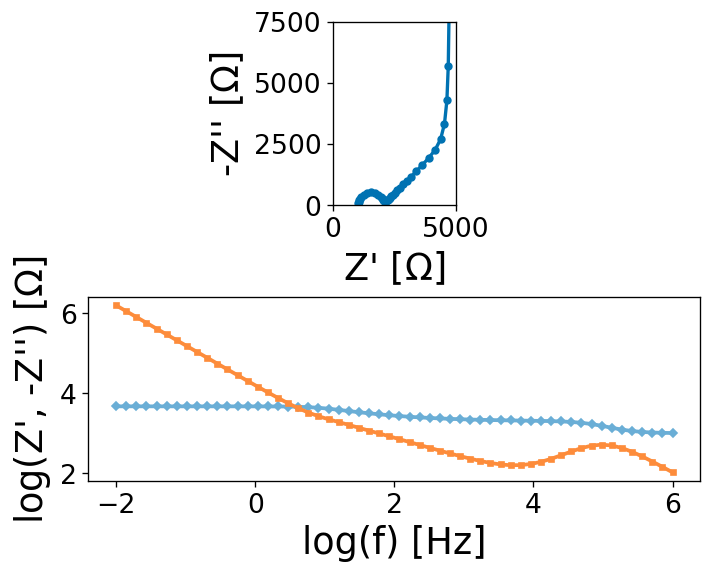

In [37]:
RsRQTLQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQTLQ(w=f_range[1], L=100, Rs=100, Q=10**-7, n=1, Rel=10, Ri=100, R1=1000, n1=1, fs1=10**5, Q1='none'), bode='log', legend='off', nyq_xlim=[0,5000], nyq_ylim=[0,7500])

## Simulation of -Rs-TL-
The Transmission Line with full complexity as defined by De Levie and Delahay [5] with non-blocking interface (i.e. reacting). This circuits models a porous electrode assuming all pores can be modelded as a single cylinderic pore but also account for the electronic resistance of the solid electrode, which has been shown for among other Li-ion materials to change as a function of chage, i.e. intercalation [8].

<img src='pyEIS_images/RsTL_circuit.png' width=500>

#### Input parameters:
- Rs = Series resistance [ohm]
- R = interfacial charge transfer resistance [ohm * cm]
- fs = Summit frequency for the interfacial RQ element [Hz]
- n = exponenet for interfacial RQ element [-]
- Q = Constant phase element for the interfacial capacitance [s^n/ohm]
- Rel = electronic resistance of electrode [ohm/cm]
- Ri = Ionic resistance inside of flodded pores [ohm/cm]
- L = thickness of porous electrode [cm]

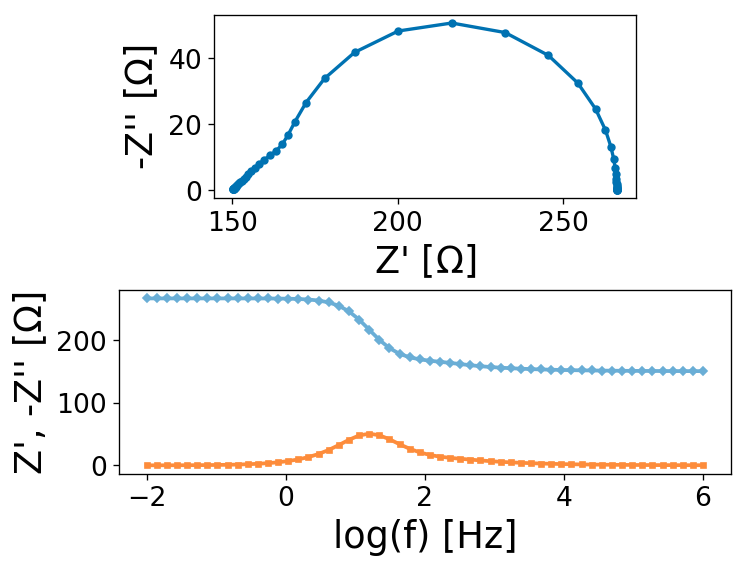

In [38]:
RsTL_example = EIS_sim(frange=f_range[0], circuit=cir_RsTL(w=f_range[1], L=10, Rs=100, R=1000, Q=10**-5, n=1, Rel=10, Ri=10, fs='none'), bode='on', legend='off')

## Simulation of -Rs-(RQ)-TL-

Similar to the previous circuit with a -(RQ)- circuit in series.

<img src='pyEIS_images/RsRQTL_circuit.png' width=500>

#### Input parameters:
- Rs = Series resistance [ohm]  
- R1 = Charge transfer resistance of RQ circuit [ohm]
- fs1 = Summit frequency for RQ circuit [Hz]
- n1 = exponent for RQ circuit [-]
- Q1 = constant phase element of RQ circuit [s^n/(ohm * cm)]
- R2 = interfacial charge transfer resistance [ohm * cm]
- fs2 = Summit frequency for the interfacial RQ element [Hz]
- n2 = exponenet for interfacial RQ element [-]
- Q2 = Constant phase element for the interfacial capacitance [s^n/ohm]
- Rel = electronic resistance of electrode [ohm/cm]
- Ri = Ionic resistance inside of flodded pores [ohm/cm]
- L = thickness of porous electrode [cm]

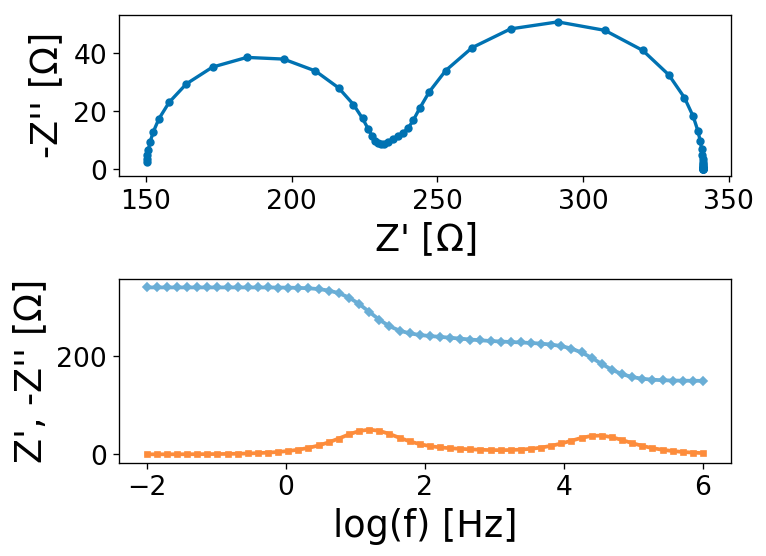

In [39]:
RsRQTL_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQTL(w=f_range[1], L=10, Rs=100, R1=75, fs1=10**4.5, n1=1, R2=1000, fs2='none', n2=1, Rel=10, Ri=10, Q1='none', Q2=10**-5), bode='on', legend='off')

## Simulation of -Rs-TL1Dsolid-

This is a transmission line circuit that models porous electrodes with the full complexity of DeLevie and Delahays porous model, which includes the electronic conductivity of the solid electrode. The interfacial impededance is modeld with a Randles-line circuit that includes the interfacial charge transfer resistance (R), the interfacial capacitance (Q), and mass transport element W$_{FS,1D}$ [5-7,8-9]. This specific Warburg element is solved for a one-dimensional diffusion path which is terminated by an impermeable boundary, spefically this can be use to solve the mass transport of intercalating Li$^+$ in Li-ion materials that display a diffusion process along one-dimension in their crystal lattice, such as LiFePO$_4$ [10]. As seen on the equivalent circuit, the W$_{FS,1D}$ is therefore placed on the electrode, in series with the charge transfer resistance as this step requires kinetic activation.

<img src='pyEIS_images/RsTL1Dsolid.png' width=500>

#### Input parameters
- Rs = Series resistance [ohm]
- R = particle charge transfer resistance [ohm*cm^2]
- Q = Summit frequency peak of RQ element in the modified randles element of a particle [Hz]
- n = exponenet for internal RQ element in the modified randles element of a particle [-]
- Rel = electronic resistance of electrode [ohm/cm]
- Ri = ionic resistance of solution in flooded pores of electrode [ohm/cm]
- R_w = polarization resistance of finite diffusion Warburg element [ohm]
- n_w = exponent for Warburg element [-]
- L = thickness of porous electrode [cm]
- D = solid-state diffusion coefficient [cm^2/s]
- radius = average particle radius [cm]

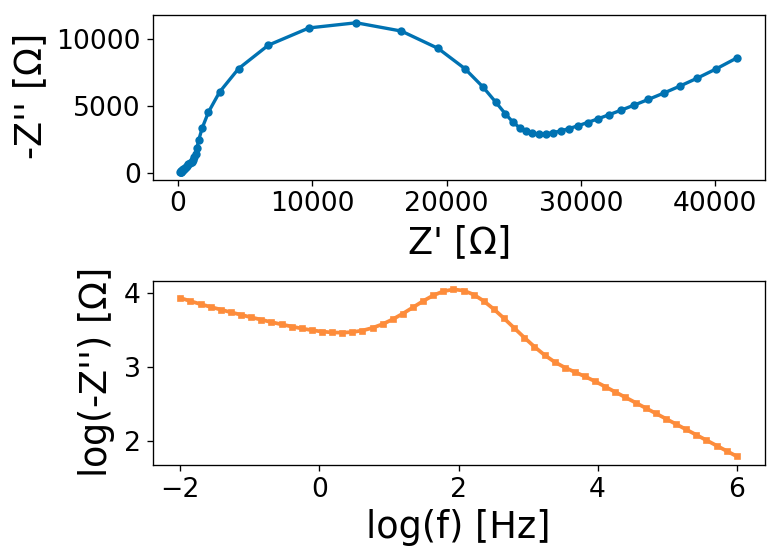

In [40]:
RsTL1Dsolid_example = EIS_sim(frange=f_range[0], circuit=cir_RsTL_1Dsolid(w=f_range[1], L=75*10**-3, D=10**-10, radius=250*10**-6, Rs=50, R=1500, Q=10**-6, n=1, R_w=4000, n_w=.24, Rel=1000, Ri=50000), bode='log_im', legend='off')

## Simulation of -Rs-(RQ)-TL1Dsolid-

Similar to the previous equivalent circuit with a -(RQ)- circuit in series.

<img src='pyEIS_images/RsRQTL1Dsolid.png' width=500>

#### Input parameters:
- Rs = Series resistance [ohm]
- R1 = charge transfer resistance of the interfacial RQ element [ohm*cm^2]
- fs1 = max frequency peak of the interfacial RQ element[Hz]
- n1 = exponenet for interfacial RQ element
- R2 = particle charge transfer resistance [ohm*cm^2]
- Q2 = Summit frequency peak of RQ element in the modified randles element of a particle [Hz]
- n2 = exponenet for internal RQ element in the modified randles element of a particle [-]
- Rel = electronic resistance of electrode [ohm/cm]
- Ri = ionic resistance of solution in flooded pores of electrode [ohm/cm]
- R_w = polarization resistance of finite diffusion Warburg element [ohm]
- n_w = exponent for Warburg element [-]
- L = thickness of porous electrode [cm]
- D = solid-state diffusion coefficient [cm^2/s]
- radius = average particle radius [cm]

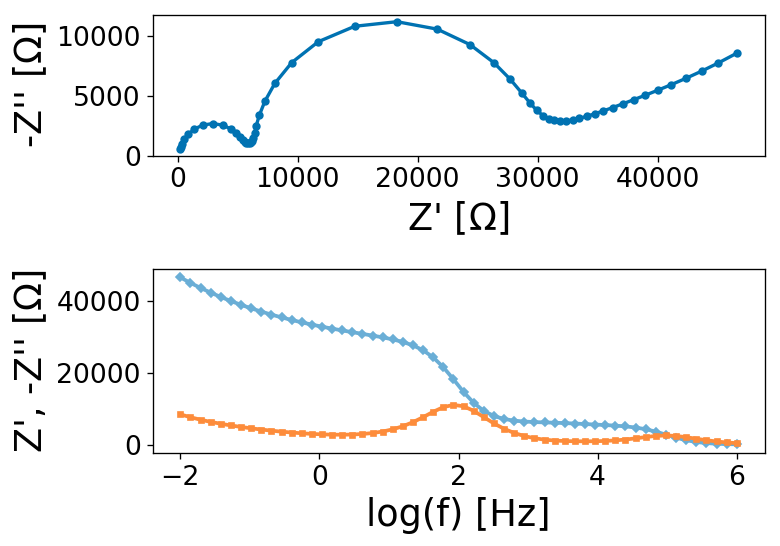

In [41]:
RsRQTL1Dsolid_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQTL_1Dsolid(w=f_range[1], L=75*10**-3, D=10**-10, radius=250*10**-6, Rs=50, R1=5000, fs1=10**5, n1=1, R2=1500, Q2=10**-6, n2=1, R_w=4000, n_w=0.24, Rel=1000, Ri=50000, Q1='none'), bode='on', legend='off')#, nyq_xlim=[0,2000], nyq_ylim=[0,2000])

# Equivalent Circuit Fitting
Fitting a simulated spectras might seem rather pointless as this excercise does not deliver any new information. However in the development of new equivalent circuit function and understanding how to use PyEIS, the procedure of intial guesses and the following lines of code to perform a fit of a simulation hopefully aids new users in understanding the software.

The fitting algorithm in PyEIS relies on minimizing the weighed complex non-linear least squares, as:

## $S = \sum{[ \omega'_i \cdot (Z'_i - Z'_{i,fit})^{2} + \omega''_i \cdot (Z''_i - Z''_{i,fit})^2 ]}$

where $\omega'_i$ and $\omega''_i$ are the statistical weights of the data points and fits over all frequencies [2]. The minimization is carried out using Marquardt-Levenberg Algorith implemented through the lmfit python package [11]. Three weight functions are currently avalialbe: unity-, proportional-, and modulus weighing. As a rule of thumb the latter often, but not always, yields in the lowest relative residuals, i.e. the best fits.

## Time constants of -(RQ)- and -(RC)- circuits

For later purposes of fitting, introducing time contants ($\tau$) into the circuit definations becomes very convinient as fitting bounds can be set to frequencies instead of capacitance or constant phase element values, this makes intially guess of capacitive values equally easy as reading resistances in a Nyquist plot. The time constant or relaxation time is characterized by the response of a first order linear time-invariant system. For -(RC)- systems this is given by

#### $\tau = R \cdot C$

The time constant is also given by the angular frequency ($\omega$), which can be converted into the time domain as follows:

#### $\tau = \frac{1}{\omega} = 2 \pi f_s$

Where f$_s$ is the summit frequency for an -(RC)- curcuit. For distributed elements such as -(Q)-, the exponent n should be included

#### $\tau = \frac{1}{\omega} = (2 \pi f_s)^n$

Now R and Q, or C, can be isolated seperately as:

#### $ R \cdot Q = 1/(2 \pi f_s)^n$

Where

### $R = \frac{1}{(2 \pi f_s)^n \cdot Q}$

and 

### $Q = \frac{1}{(2 \pi f_s)^n \cdot R}$

The impedance of an -(RQ)- circuit can therefore also be given by the following two equations and for a situation where Q is unknown, f$_s$ can instead be used as a fitting parameter:

### $Z_{(RQ)} = \frac{R}{1 + R \cdot Q \cdot (j\cdot \omega)^n} = [\Omega]$

### $Z_{(RQ)} = \frac{R \cdot (2 \pi f_s)^n \cdot R}{1 + R \cdot (2 \pi f_s)^n} = [\Omega]$ 

In a simular fashion, this can be done for R and n. This allows the software to fit or simulate any of the RQ containing circuit using three of the given parameters R, Q, n, fs. Most applicable is the combinatin of R, n, and fs, as both R and fs can be read off the Nyquist and Bode plots, respectivley.

In the following, an examples of each circuit avaliable in PyEIS is fitted. As these functions have been described earlier, we simply use these variables as inputs to the fits.


To fit a spectra, an intial guess is needed for each parameter in the circuit. In this example for the cir_RQ(), the three parameters: R, n, and fs will be used. To make qualified guesses for these parameters, the resistance (R) should be read of the x-axis of the Nyquist plot, while the summit frequency of the (RQ) circuit can be read of the Bode plot. Here initial guesses of R = 50 $\Omega$, n = 0.9, and fs = 10$^1$ Hz seems reasonable.

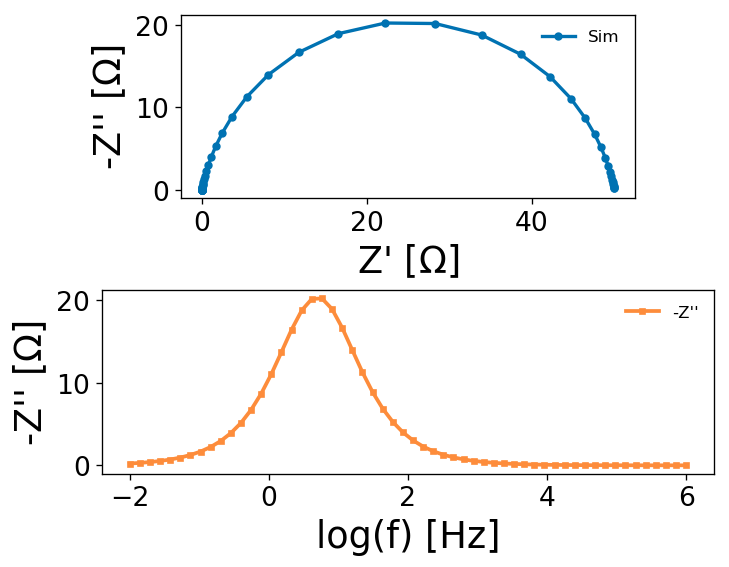

In [42]:
RQ_example2 = EIS_sim(frange=f_range[0], circuit=cir_RQ(w=f_range[1], R=50, n=.87, Q=10**-3), bode='im')

To fit a spectra the parameters which the software should fit are defined by:
- params = Parameters()

This creats a space where the lmfit() function is informed by which parameters and consequently which equations are minimized. As previously mentioned R, n, and fs are used in this first example. To add a parameter use
- params.add('parameter name', min=min_value, max=max_value)

This should be done for each parameter as:

- params.add('R', value=50, min=10, max=500)
- params.add('n', value=0.9, min=0.7, max=1)
- params.add('fs', value=10$^1$, min=10$^{-1}$, max=10$^{2}$)

To fit and plot the impedance with these initial guesses use:
- EIS_sim_fit(params, circuit, weight_func='modulus', nan_policy='raise', bode='on', nyq_xlim='none', nyq_ylim='none', legend='on', savefig='none')

Some of these functions in EIS_sim_fit() are simular to the EIS_sim() function, such as bode, nyq_xlim, nyq_ylim, legend, and savefig and have been introduced in the above. params should be set equal to params, as we defined the Parameters() space for lmfit as params, the weight_function is how equation S, in the above, is weighed and the options are: 'unity', 'modulus', 'proportional', which a default value = 'modulus'. nan_policy is a function that rarely deals with handling NaN values generated during fitting and the circuit function is the parameter that informs the software which equivalent circuit is fitted to the simulated data. An overview of circuits avalialbe is given below and in the equivalent circuit overview. For this example, circuit = 'RQ'.
- RC
- RQ
- R-RQ
- R-RQ-RQ
- R-Q
- R-RQ-Q
- R-(Q(RW))
- C-RC-C
- Q-RQ-Q
- RC-RC-ZD
- R-TLsQ
- R-RQ-TLsQ
- R-TLs
- R-RQ-TLs
- R-TLQ
- R-RQ-TLQ
- R-TL
- R-RQ-TL
- R-TL1Dsolid
- R-RQ-TL1Dsolid

To fit and plot the RQ circuit, the following procedure is performed

[[Fit Statistics]]
    # function evals   = 95
    # data points      = 112
    # variables        = 3
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -6346.960
    Bayesian info crit = -6338.804
[[Variables]]
    R:    50.0000074 +/- 2.42e-07 (0.00%) (init= 200)
    n:    0.86999997 +/- 9.26e-09 (0.00%) (init= 0.9)
    fs:   4.98031663 +/- 9.03e-08 (0.00%) (init= 10)
[[Correlations]] (unreported correlations are <  0.100)
    C(R, fs)                     = -0.542 
    C(R, n)                      = -0.439 
    C(n, fs)                     =  0.355 
None


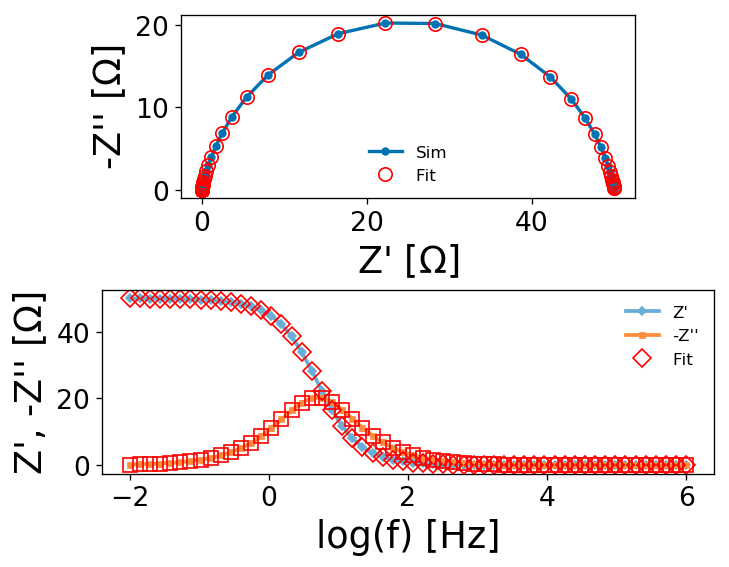

In [43]:
R_guess = 200
n_guess = .9
fs_guess = 10**1

params = Parameters()
params.add('R', value=R_guess, min=10, max=500)
params.add('n', value=n_guess, min=0.7, max=1)
params.add('fs', value=fs_guess, min=10**-1, max=10**2)

RQ_example2.EIS_sim_fit(params=params, circuit='RQ', bode='on')

The fit finds the minimum least-squares fast although the initial resistance guess was set to 200 $\Omega$s, 150 $\Omega$ off the actual value of 50 $\Omega$. The min/max values of each parameters should be given with care, as these often can cause issues. R and fs and their limits can be visually determined, while the exponential n should be limited, such that fitted values represent physically reasonable values. For heterogeneous charge transfer an exponent n of 0.7-1 is often reasonable if the surface has a certain roughness [2], hence the bound of n = [0.7,1.0] was used in the above.

The fitted parameters are given in the text output shown above the figure. This among other also include the chi-squared and number of iteration. The fitted values are also saved in the function that was called, and can be found in e.g. RQ_example2.fit_"name_of_parameter". As shown

In [44]:
print(RQ_example2.fit_R)
print(RQ_example2.fit_n)
print(RQ_example2.fit_fs)

[50.000007494132703]
[0.86999997794155037]
[4.9803166297371844]


In the above, the ease of using fs over Q is illustrated in the bode plot where the time constant of the circuit is clearly shown to be around 10$^1$ Hz, hence the initial guess of fs should be set to 10$^1$ Hz. However Q, instead of fs, can still be used as a fitting parameter

[[Fit Statistics]]
    # function evals   = 103
    # data points      = 112
    # variables        = 3
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -6883.338
    Bayesian info crit = -6875.182
[[Variables]]
    R:   50.0000026 +/- 6.60e-08 (0.00%) (init= 200)
    n:   0.86999996 +/- 4.26e-09 (0.00%) (init= 0.9)
    Q:   0.00100000 +/- 1.38e-11 (0.00%) (init= 0.001)
[[Correlations]] (unreported correlations are <  0.100)
    C(n, Q)                      = -0.902 
    C(R, n)                      = -0.276 
    C(R, Q)                      =  0.261 
None


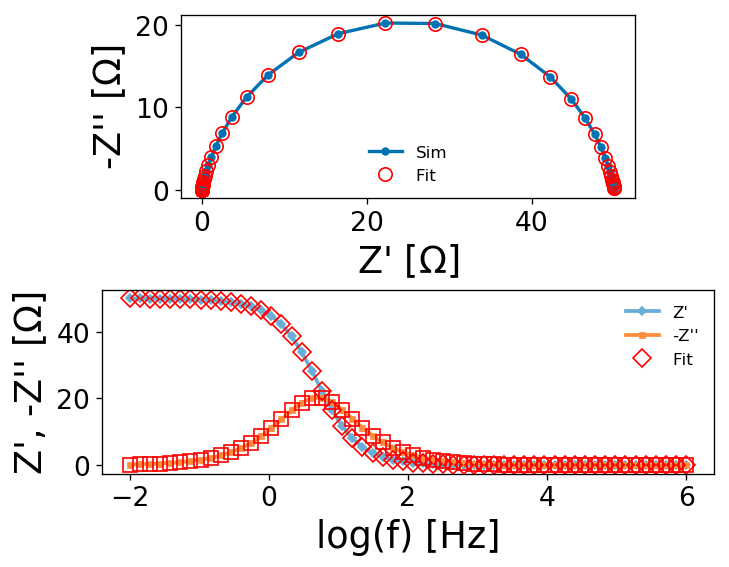

In [45]:
R_guess = 200
n_guess = 0.9
Q_guess = 10**-3
params = Parameters()
params.add('R', value=R_guess, min=10, max=500)
params.add('n', value=n_guess, min=0.7, max=1.0)
params.add('Q', value=Q_guess, min=10**-7, max=10**-2)

RQ_example2.EIS_sim_fit(params=params, circuit='RQ', bode='on')

Again the fitted parameters are saved in the function called, as:

In [46]:
print(RQ_example2.fit_R)
print(RQ_example2.fit_n)
print(RQ_example2.fit_Q)

[50.000002631944177]
[0.86999996055157058]
[0.0010000002268647573]


# Fit of -R-RQ-

Similar as above, here a series resistance is added to the circuit

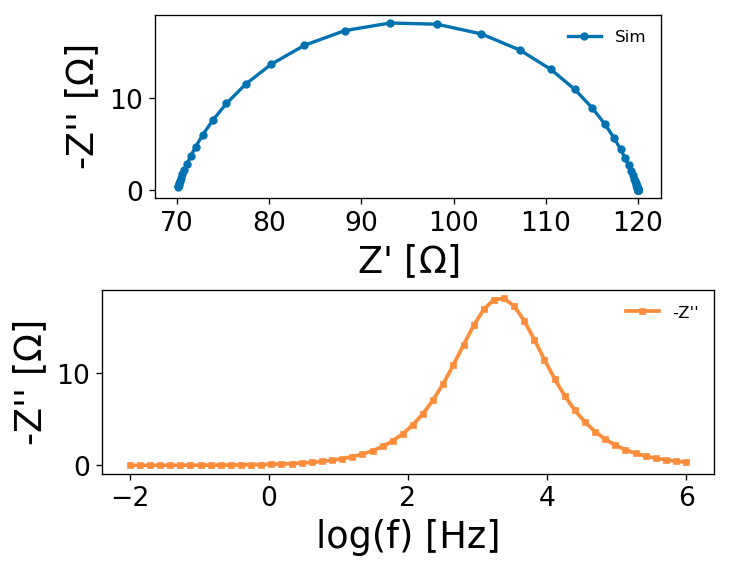

In [47]:
RsRQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQ(w=f_range[1], Rs=70, R=50, n=.8, Q=10**-5), bode='im', legend='on')

[[Fit Statistics]]
    # function evals   = 103
    # data points      = 112
    # variables        = 4
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -4274.522
    Bayesian info crit = -4263.648
[[Variables]]
    Rs:   69.9998643 +/- 0.000223 (0.00%) (init= 10)
    R:    50.0012147 +/- 0.000220 (0.00%) (init= 10000)
    n:    0.79999494 +/- 3.76e-06 (0.00%) (init= 0.7)
    fs:   2128.65469 +/- 0.023832 (0.00%) (init= 1000)
[[Correlations]] (unreported correlations are <  0.100)
    C(Rs, R)                     = -0.992 
    C(Rs, fs)                    = -0.660 
    C(R, fs)                     =  0.646 
    C(n, fs)                     = -0.532 
    C(R, n)                      = -0.441 
    C(Rs, n)                     =  0.401 
None


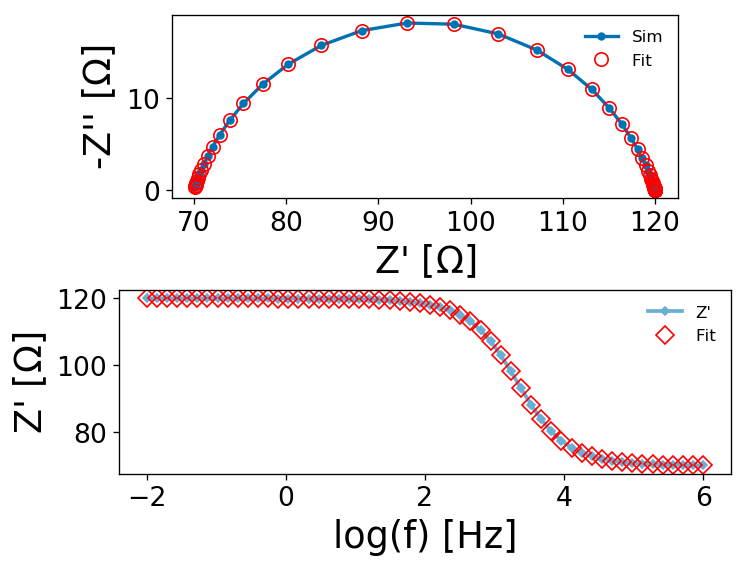

In [48]:
Rs_guess = 10
R_guess = 10000
n_guess = 0.7
fs_guess = 10**3

params = Parameters()
params.add('Rs', value=Rs_guess, min=Rs_guess*.01, max=Rs_guess*100)
params.add('R', value=R_guess, min=R_guess*.001, max=R_guess*100)
params.add('n', value=n_guess, min=n_guess*.1, max=n_guess*10)
params.add('fs', value=fs_guess, min=fs_guess*.01, max=fs_guess*100000)
#params.add('Q', value=fs_guess, min=fs_guess*.01, max=fs_guess*100000)

RsRQ_example.EIS_sim_fit(params=params, circuit='R-RQ', bode='re')

In [49]:
print(RsRQ_example.fit_Rs)
print(RsRQ_example.fit_R)
print(RsRQ_example.fit_n)
print(RsRQ_example.fit_fs)

[69.999864296270829]
[50.001214782742203]
[0.7999949407791227]
[2128.6546928326015]


# Fit of -R-RQ-RQ-

Two -(RQ)- circuits in the same spectra can be difficuilt to experimentally fit when using the traditional Q, R, n elements to fit the two -(RQ)- circuit, as the Q element can exchange time constants during the iteration procedure. It is therefore recommended that fs is instead used, and that the min/max values of the two time constants (fs, fs2) are limited such that the elements cannot exchange. In the following example, the high freqency semi-circle (fs) has a low limit of 10$^{0.5}$ Hz, while the lower frequency process (fs2) has a high frequency limit of 10$^1$ Hz.

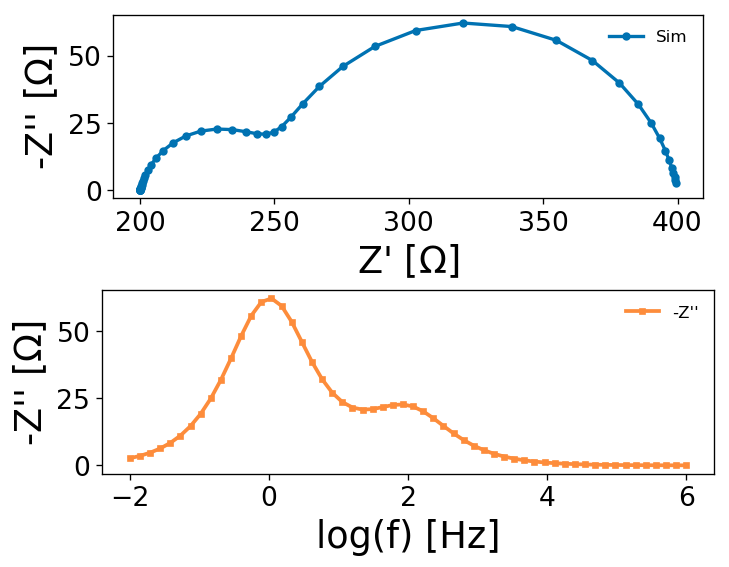

In [50]:
RsRQRQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQRQ(w=f_range[1], Rs=200, R=150, n=.872, fs=1, R2=50, n2=.853, fs2=100), bode='im', legend='on')

[[Fit Statistics]]
    # function evals   = 171
    # data points      = 112
    # variables        = 7
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -5906.561
    Bayesian info crit = -5887.531
[[Variables]]
    Rs:    199.999991 +/- 4.05e-06 (0.00%) (init= 150)
    R:     50.0000538 +/- 1.09e-05 (0.00%) (init= 150)
    n:     0.85299916 +/- 2.70e-07 (0.00%) (init= 0.8)
    fs:    99.9998678 +/- 3.80e-05 (0.00%) (init= 100)
    R2:    150.000011 +/- 1.01e-05 (0.00%) (init= 225)
    n2:    0.87200017 +/- 4.64e-08 (0.00%) (init= 1)
    fs2:   0.99999982 +/- 1.04e-07 (0.00%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(R, R2)                     = -0.883 
    C(R2, n2)                    = -0.783 
    C(R2, fs2)                   =  0.757 
    C(R, fs2)                    = -0.726 
    C(R, n)                      = -0.709 
    C(n, R2)                     =  0.703 
    C(n2, fs2)                   = -0.603 
    C(R, n2)

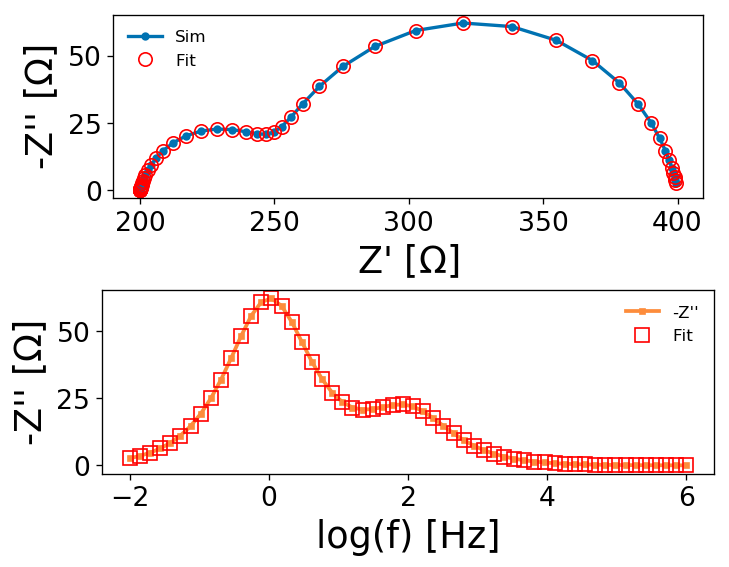

In [51]:
Rs_guess = 180

R_guess = 150
n_guess = .8
fs_guess = 10**2

R2_guess = 225
n2_guess = 1
fs2_guess = 10**0


params = Parameters()
params.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params.add('n', value=n_guess, min=.65, max=1.2)
params.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params.add('n2', value=n2_guess, min=.65, max=1.2)
params.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params.add('Q2', value=fs2_guess, min=10**-2, max=10**2)

RsRQRQ_example.EIS_sim_fit(params=params, circuit='R-RQ-RQ', bode='im')

In [52]:
print(RsRQRQ_example.fit_Rs)
print()
print(RsRQRQ_example.fit_R)
print(RsRQRQ_example.fit_n)
print(RsRQRQ_example.fit_fs)
print()
print(RsRQRQ_example.fit_R2)
print(RsRQRQ_example.fit_n2)
print(RsRQRQ_example.fit_fs2)

[199.99999165354279]

[50.000053827311312]
[0.85299916624332317]
[99.9998678147806]

[150.00001111027075]
[0.87200017249406314]
[0.99999982179050495]


## Fit of -R-Q- (Blocking electrodes)

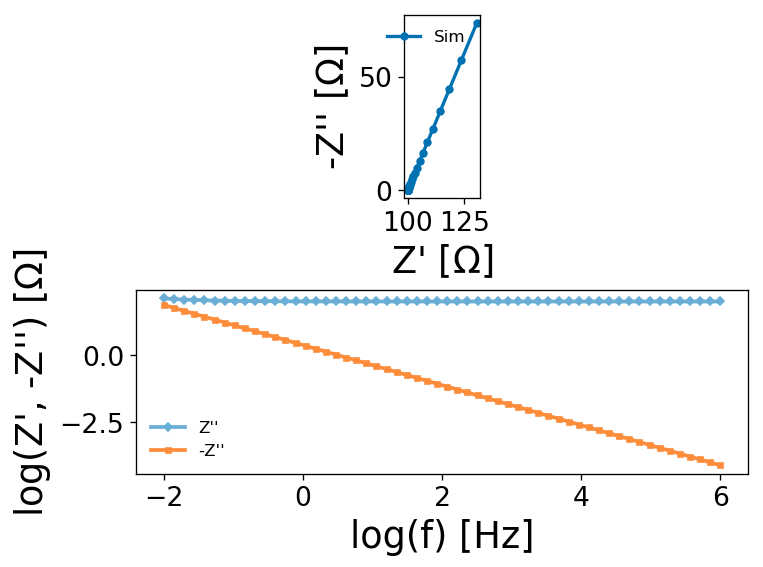

In [53]:
RsQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsQ(w=f_range[1], Rs=100, Q=10**-1, n=.75), bode='log', legend='on')#, nyq_xlim=[0,150])#, nyq_ylim=[0,10])

[[Fit Statistics]]
    # function evals   = 139
    # data points      = 112
    # variables        = 3
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -6617.180
    Bayesian info crit = -6609.024
[[Variables]]
    Rs:   99.9999948 +/- 9.63e-08 (0.00%) (init= 180)
    Q:    0.09999997 +/- 3.92e-09 (0.00%) (init= 0.01)
    n:    0.74999994 +/- 1.24e-08 (0.00%) (init= 0.9)
[[Correlations]] (unreported correlations are <  0.100)
    C(Q, n)                      =  0.958 
None


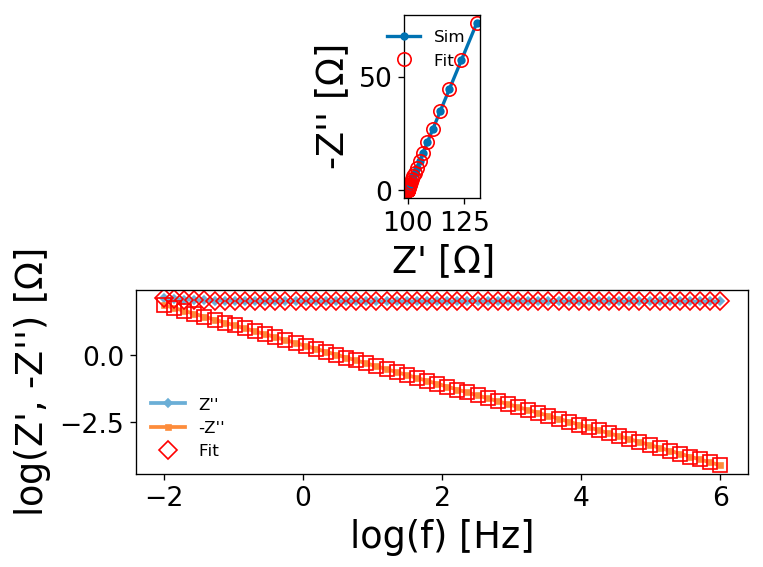

In [54]:
Rs_guess = 180

Q_guess = 10**-2
n_guess = .9

params = Parameters()
params.add('Rs', value=Rs_guess, min=Rs_guess*.01, max=Rs_guess*100)

params.add('Q', value=Q_guess, min=Q_guess*.1, max=Q_guess*10)
params.add('n', value=n_guess, min=.65, max=1.2)

RsQ_example.EIS_sim_fit(params=params, circuit='R-Q', bode='log')

## Fit of -R-RQ-Q-

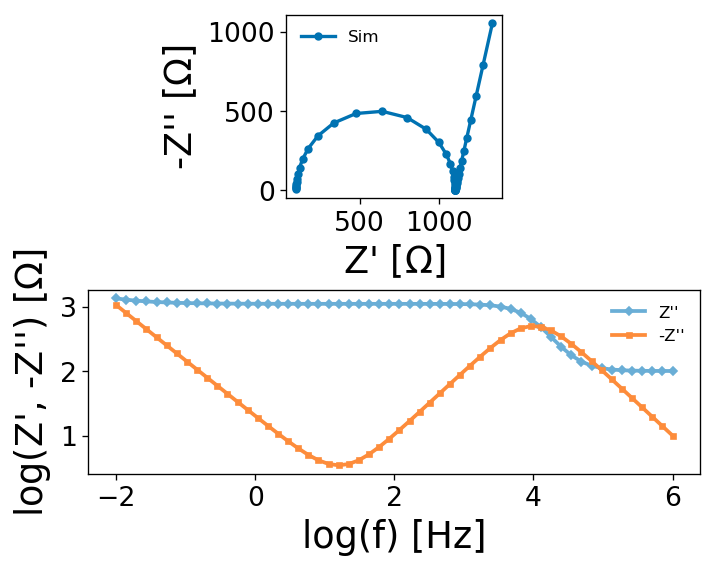

In [55]:
RsRQQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQQ(w=f_range[1], Rs=100, Q=10**-2, n=0.86, R1=1000, Q1='none', n1=1, fs1=10**4), bode='log', legend='on')

[[Fit Statistics]]
    # function evals   = 143
    # data points      = 112
    # variables        = 6
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -5576.868
    Bayesian info crit = -5560.557
[[Variables]]
    Rs:    100.000061 +/- 2.39e-06 (0.00%) (init= 180)
    Q:     0.01000000 +/- 5.90e-10 (0.00%) (init= 0.01)
    n:     0.86000004 +/- 1.74e-08 (0.00%) (init= 0.9)
    R1:    999.999850 +/- 8.82e-06 (0.00%) (init= 800)
    n1:    0.99999990 +/- 1.18e-08 (0.00%) (init= 0.9)
    fs1:   10000.0002 +/- 0.000304 (0.00%) (init= 10000)
[[Correlations]] (unreported correlations are <  0.100)
    C(Q, n)                      =  0.779 
    C(Rs, n1)                    =  0.517 
    C(R1, n1)                    = -0.515 
    C(n, R1)                     =  0.428 
    C(Rs, R1)                    = -0.426 
    C(Q, R1)                     =  0.406 
    C(n1, fs1)                   =  0.391 
    C(R1, fs1)                   = -0.347 
    C(n, n1)     

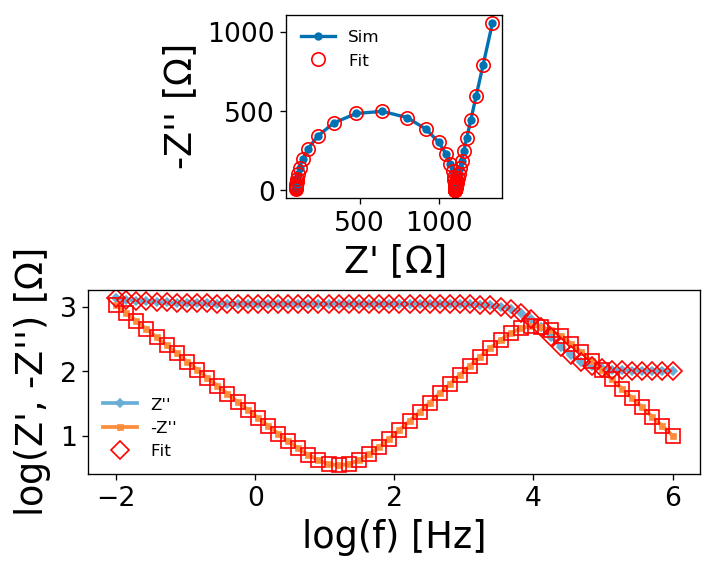

In [56]:
Rs_guess = 180

Q_guess = 10**-2
n_guess = .9


R1_guess = 800
n1_guess = .9
fs1_guess = 10**4

params = Parameters()
params.add('Rs', value=Rs_guess, min=Rs_guess*.01, max=Rs_guess*100)

params.add('Q', value=Q_guess, min=Q_guess*.1, max=Q_guess*10)
params.add('n', value=n_guess, min=.65, max=1.2)

params.add('R1', value=R1_guess, min=R1_guess*.1, max=R1_guess*10)
params.add('n1', value=n1_guess, min=.65, max=1.2)
params.add('fs1', value=fs1_guess, min=10**1, max=10**6)

RsRQQ_example.EIS_sim_fit(params=params, circuit='R-RQ-Q', bode='log')

## Fit of -R-Q(RW)- (Randles circuit)

Only the simplified Randles circuit is currently avalaible for fitting, hence the magnitude of sigma controlles the mass-transport impedance.

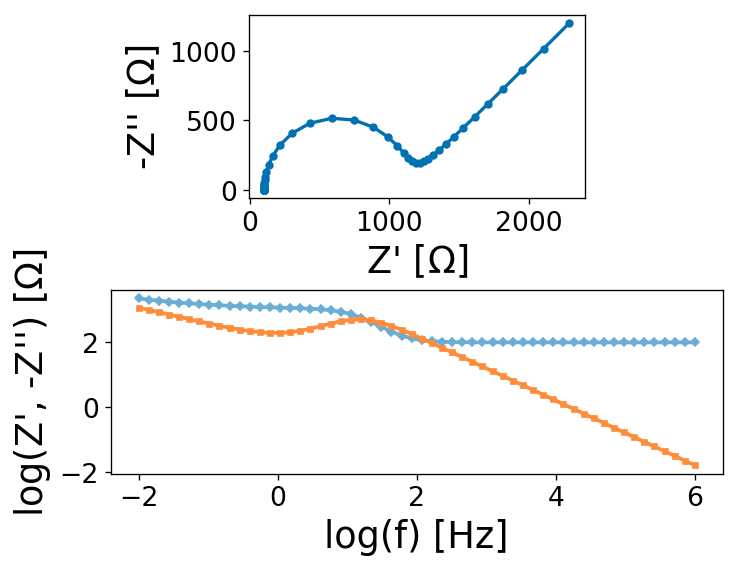

In [57]:
Randles_example = EIS_sim(frange=f_range[0], circuit=cir_Randles_simplified(w=f_range[1], Rs=100, R=1000, Q=10**-5, n=1, sigma=300), bode='log', legend='off')

[[Fit Statistics]]
    # function evals   = 233
    # data points      = 112
    # variables        = 5
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -7221.363
    Bayesian info crit = -7207.770
[[Variables]]
    Rs:      99.9999994 +/- 1.85e-08 (0.00%) (init= 90)
    R:       1000.00000 +/- 6.92e-08 (0.00%) (init= 1250)
    Q:       1.0000e-05 +/- 1.33e-15 (0.00%) (init= 1e-06)
    n:       0.99999999 +/- 4.07e-10 (0.00%) (init= 0.8)
    sigma:   299.999996 +/- 1.75e-08 (0.00%) (init= 2000)
[[Correlations]] (unreported correlations are <  0.100)
    C(Q, n)                      =  0.814 
    C(R, sigma)                  = -0.279 
    C(R, Q)                      = -0.114 
None


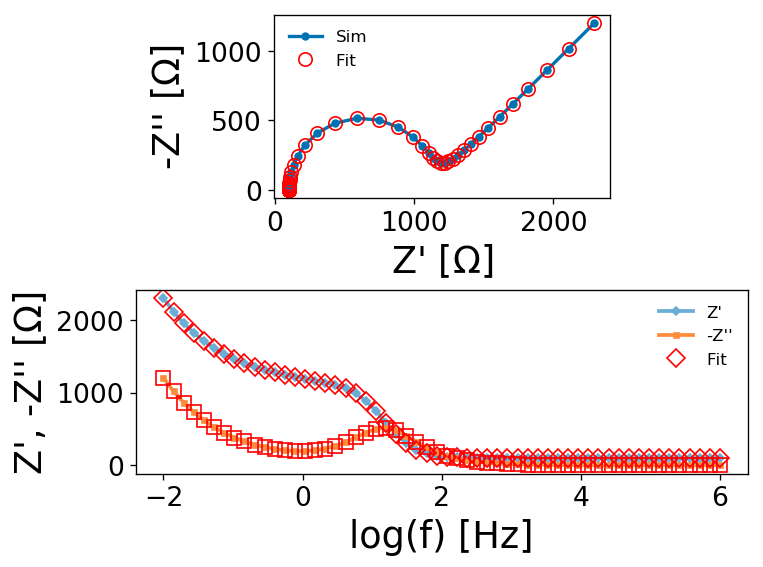

In [58]:
params = Parameters()
Rs_guess = 90
params.add('Rs', value=Rs_guess, min=Rs_guess*.01, max=Rs_guess*10)
R_guess = 1250
params.add('R', value=R_guess, min=R_guess*.01, max=R_guess*10)

Q_guess = 10**-6
params.add('Q', value=Q_guess, min=Q_guess*.01, max=Q_guess*1000)

#fs_guess = 10**4
#params.add('fs', value=fs_guess, min=10**2.5, max=10**5.5)

n_guess = 0.8
params.add('n', value=n_guess, min=.7, max=1)
sigma_guess = 2000
params.add('sigma', value=sigma_guess, min=sigma_guess*.01, max=sigma_guess*10)

Randles_example.EIS_sim_fit(params=params, circuit='R-(Q(RW))', bode='on')

In [59]:
print(Randles_example.fit_Rs)
print(Randles_example.fit_R)
print(Randles_example.fit_n)
print(Randles_example.fit_Q)
#print(Randles_example.fit_fs)
print(Randles_example.fit_sigma)

[99.999999493722953]
[1000.0000036881397]
[0.99999999726260125]
[1.00000001042437e-05]
[299.99999684527097]


## Fit of C$_e$-RC$_b$-C$_e$

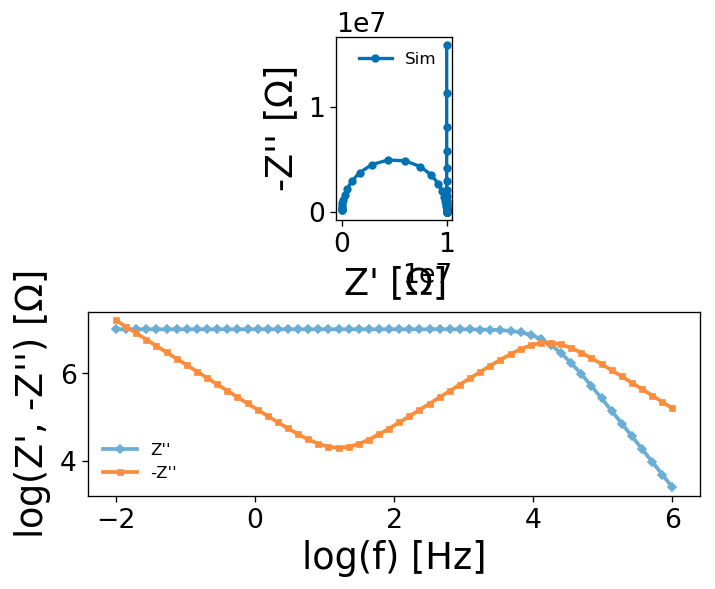

In [60]:
C_RC_C_example = EIS_sim(frange=f_range[0], circuit=cir_C_RC_C(w=f_range[1], Ce=10**-6, Cb=10**-12, Rb=10**7, fsb='none'), bode='log')

[[Fit Statistics]]
    # function evals   = 155
    # data points      = 112
    # variables        = 3
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -3607.056
    Bayesian info crit = -3598.901
[[Variables]]
    Ce:   1.0000e-06 +/- 1.15e-15 (0.00%) (init= 1e-06)
    Cb:   1.0000e-12 +/- 1.03e-18 (0.00%) (init= 1e-10)
    Rb:   1.0000e+07 +/- 0.503428 (0.00%) (init= 1e+07)
None


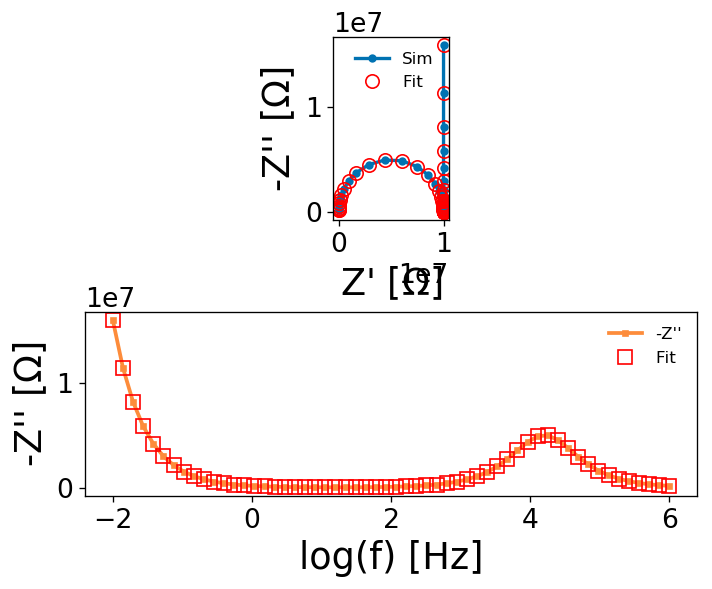

In [61]:
params = Parameters()
Ce_guess = 10**-6
params.add('Ce', value=Ce_guess, min=Ce_guess*.1, max=Ce_guess*10)
Cb_guess = 10**-10
params.add('Cb', value=Cb_guess, min=Cb_guess*.01, max=Cb_guess*10)
Rb_guess = 10**7
params.add('Rb', value=Rb_guess, min=Rb_guess*.1, max=Rb_guess*10)

C_RC_C_example.EIS_sim_fit(params=params, circuit='C-RC-C', bode='im')

In [62]:
print(C_RC_C_example.fit_Ce)
print(C_RC_C_example.fit_Rb)
print(C_RC_C_example.fit_Cb)

[1.0000002471183723e-06]
[9999999.9552021809]
[1.0000000048497621e-12]


## Fit of Q$_e$-RQ$_b$-Q$_e$
Similar to the previous circuit but containing constant-phase elements instead of ideal capacitors

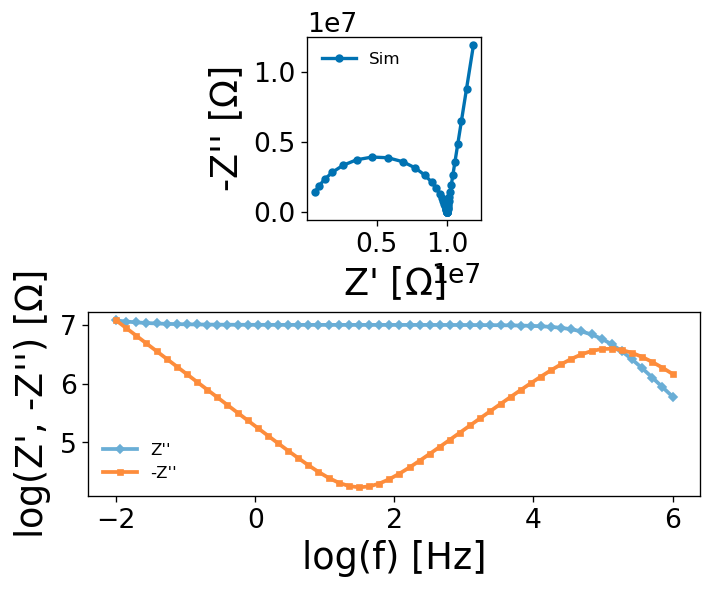

In [63]:
Q_RQ_Q_example = EIS_sim(frange=f_range[0], circuit=cir_Q_RQ_Q(w=f_range[1], Qe=10**-6, ne=.9, Qb=10**-12, Rb=10**7, fsb='none', nb=.85), bode='log')

[[Fit Statistics]]
    # function evals   = 230
    # data points      = 112
    # variables        = 5
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -4144.800
    Bayesian info crit = -4131.207
[[Variables]]
    Qe:    1.0000e-06 +/- 2.40e-14 (0.00%) (init= 1e-06)
    ne:    0.90000000 +/- 4.60e-09 (0.00%) (init= 0.9)
    Rb:    1.0000e+07 +/- 0.010549 (0.00%) (init= 1e+07)
    fsb:   1.2139e+05 +/- 0.000800 (0.00%) (init= 100000)
    nb:    0.85000002 +/- 1.81e-09 (0.00%) (init= 0.9)
[[Correlations]] (unreported correlations are <  0.100)
    C(Qe, ne)                    =  0.812 
    C(fsb, nb)                   =  0.586 
    C(ne, Rb)                    =  0.359 
    C(Qe, Rb)                    =  0.340 
    C(Rb, fsb)                   = -0.239 
    C(Rb, nb)                    = -0.117 
None


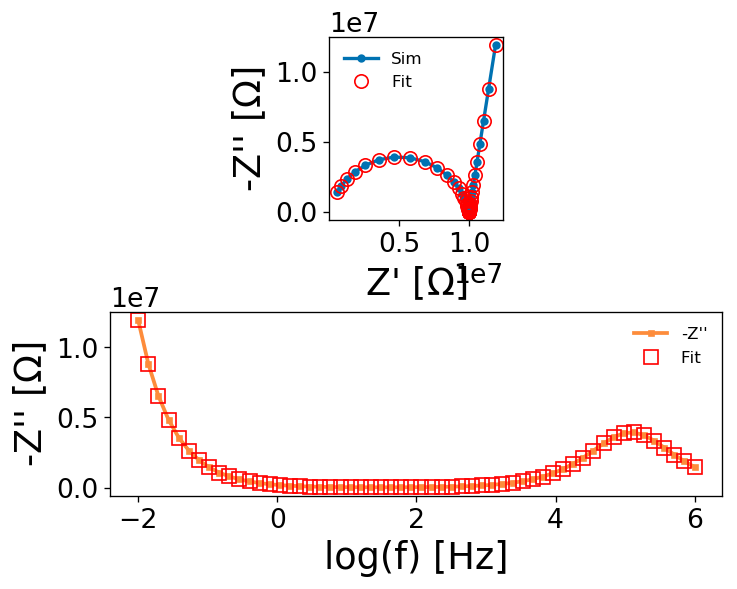

In [64]:
params = Parameters()
Qe_guess = 10**-6
params.add('Qe', value=Qe_guess, min=Qe_guess*.1, max=Qe_guess*10)
ne_guess = 0.9
params.add('ne', value=ne_guess, min=0.7, max=1)

Rb_guess = 10**7
params.add('Rb', value=Rb_guess, min=Rb_guess*.1, max=Rb_guess*10)
fsb_guess = 10**5
params.add('fsb', value=fsb_guess, min=fsb_guess*.01, max=fsb_guess*10)
nb_guess = 0.9
params.add('nb', value=nb_guess, min=0.7, max=1)

Q_RQ_Q_example.EIS_sim_fit(params=params, circuit='Q-RQ-Q', bode='im')

In [65]:
print(Q_RQ_Q_example.fit_Qe)
print(Q_RQ_Q_example.fit_ne)
print()
print(Q_RQ_Q_example.fit_Rb)
print(Q_RQ_Q_example.fit_fsb)
print(Q_RQ_Q_example.fit_nb)

[9.9999998395499852e-07]
[0.90000000271832781]

[10000000.322192442]
[121387.23634797387]
[0.85000002483650117]


## Fit of -RC$_b$-RC$_e$-Z$_D$
This circuit has previously been applied to reacting electrodes with a electrolyte that is a mixture of a ionically conducting polymer and a salt.

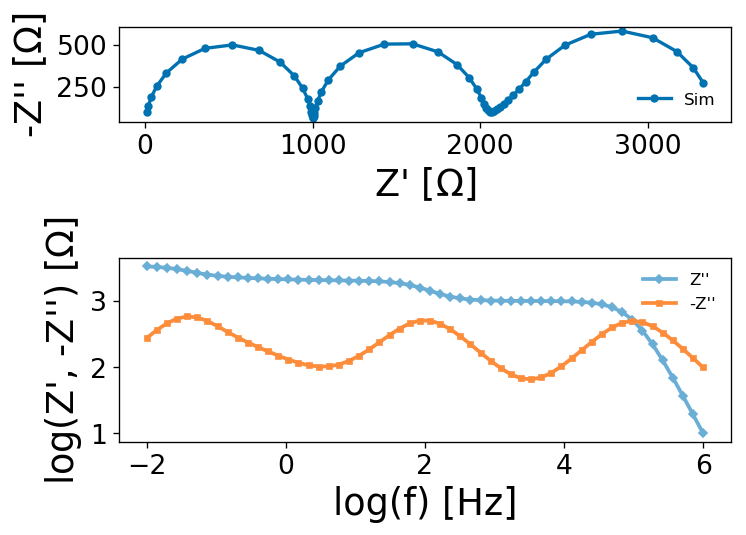

In [66]:
RCRCZD_example = EIS_sim(frange=f_range[0], circuit=cir_RCRCZD(w=f_range[1], L=10**-2, D_s=10**-5, u1=.5, u2=.7, Cb='none', Rb=10**3, fsb=10**5, Ce='none', Re=10**3, fse=10**2), bode='log')

[[Fit Statistics]]
    # function evals   = 265
    # data points      = 112
    # variables        = 8
    chi-square         = 10589236995641.100
    reduced chi-square = 101819586496.549
    Akaike info crit   = 2846.504
    Bayesian info crit = 2868.252
[[Variables]]
    Re:    1000       +/- 0        (0.00%) (init= 1000)
    fse:   100        +/- 0        (0.00%) (init= 100)
    Rb:    1000.00064 +/- 0        (0.00%) (init= 10000)
    fsb:   10000.4354 +/- 0        (0.00%) (init= 100000)
    L:     0.01115670 +/- 0        (0.00%) (init= 0.01)
    D_s:   9.8447e-06 +/- 0        (0.00%) (init= 1e-06)
    u1:    0.77749312 +/- 0        (0.00%) (init= 0.4)
    u2:    0.99997431 +/- 0        (0.00%) (init= 0.1)
None


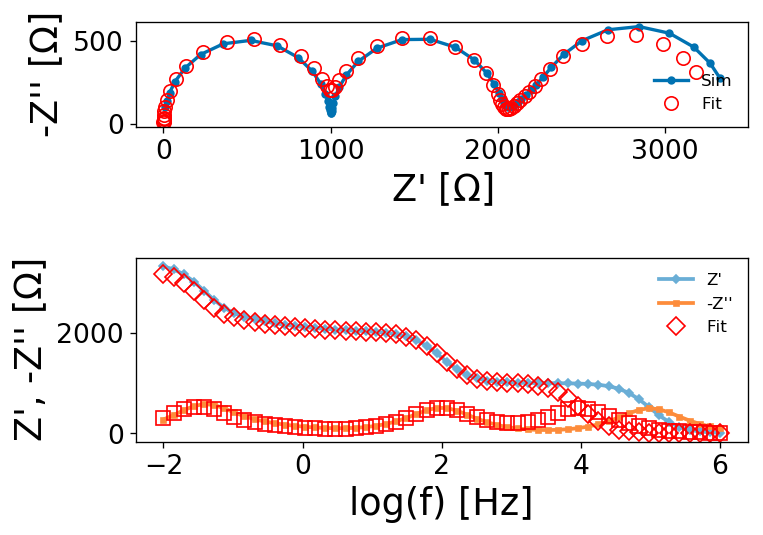

In [67]:
params = Parameters()
Re_guess = 10**3
params.add('Re', value=Re_guess, min=Re_guess*.1, max=Re_guess*10)
fse_guess = 10**2
params.add('fse', value=fse_guess, min=10**0.5, max=10**3.5)

Rb_guess = 10**4
params.add('Rb', value=Rb_guess, min=Rb_guess*.1, max=Rb_guess*10)
fsb_guess = 10**5
params.add('fsb', value=fsb_guess, min=10**4, max=10**5.5)

L_guess = 10**-2
params.add('L', value=L_guess, min=L_guess-.01, max=L_guess+0.1)

D_s_guess = 10**-6
params.add('D_s', value=D_s_guess, min=D_s_guess*.001, max=D_s_guess*10)
u1_guess = 0.4
params.add('u1', value=u1_guess, min=u1_guess*.01, max=u1_guess*10)
u2_guess = 0.1
params.add('u2', value=u2_guess, min=u2_guess*.01, max=u2_guess*10)


RCRCZD_example.EIS_sim_fit(params=params, circuit='RC-RC-ZD', weight_func='unity')#, bode='im')

In [68]:
print(RCRCZD_example.fit_L)
print(RCRCZD_example.fit_D_s)
print(RCRCZD_example.fit_u1)
print(RCRCZD_example.fit_u2)
print(RCRCZD_example.fit_Rb)
print(RCRCZD_example.fit_fsb)
print(RCRCZD_example.fit_Re)
print(RCRCZD_example.fit_fse)

[0.011156703012094879]
[9.8446621517374129e-06]
[0.77749312979269536]
[0.99997431336063025]
[1000.0006424394841]
[10000.435479567186]
[1000.0000000000003]
[99.999999999999986]


# Fit of -R-TLsQ-
Fitting simplified transmission lines to experimental data is often used as a model for electrolyte flodded porous electrodes. Here the length parameter (L) is often determined from cross-sectional SEM images [12-13]. L should therefore not be fitted as it is a known quantity. To circument fitting L the min/max values are limited close to the experimentally measured L.

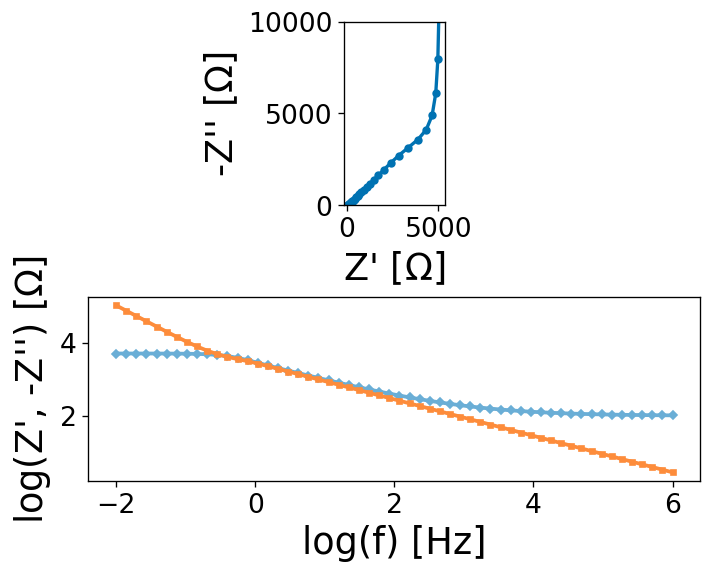

In [69]:
TLsQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsTLsQ(w=f_range[1], Rs=100, L=150, Ri=100, Q=10**-6, n=1), bode='log', legend='off', nyq_ylim=[0,10000])

[[Fit Statistics]]
    # function evals   = 694
    # data points      = 112
    # variables        = 5
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -1514.362
    Bayesian info crit = -1500.770
[[Variables]]
    Rs:   100.006236 +/- 0.007184 (0.01%) (init= 100)
    L:    149.999000 +/- 0.000100 (0.00%) (init= 150)
    Ri:   99.9983930 +/- 0.000191 (0.00%) (init= 200)
    Q:    9.9999e-07 +/- 8.29e-13 (0.00%) (init= 5e-06)
    n:    0.99999948 +/- 5.10e-08 (0.00%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(L, Q)                      = -0.971 
    C(Rs, Ri)                    = -0.812 
    C(Ri, n)                     =  0.350 
    C(Ri, Q)                     =  0.334 
    C(L, n)                      =  0.289 
    C(L, Ri)                     = -0.256 
    C(Q, n)                      = -0.116 
None


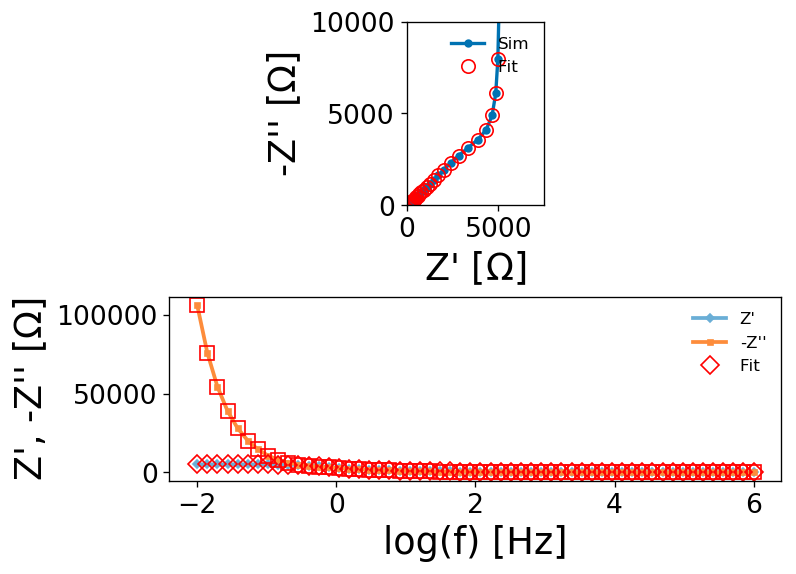

In [70]:
params = Parameters()

Rs_guess = 100
params.add('Rs', value=Rs_guess, min=Rs_guess*.01, max=Rs_guess*10)
L_guess = 150
params.add('L', value=L_guess, min=L_guess-.001, max=L_guess+.001)
Ri_guess = 200
params.add('Ri', value=Ri_guess, min=Ri_guess*0.01, max=Ri_guess*100)
Q_guess = 5*10**-6
params.add('Q', value=Q_guess, min=10**-9, max=10**-4)
n_guess = 1
params.add('n', value=n_guess, min=.7, max=1.001)

TLsQ_example.EIS_sim_fit(params=params, circuit='R-TLsQ', bode='on', nyq_xlim=[0,7500], nyq_ylim=[0,10000], weight_func='unity')

In [71]:
print(TLsQ_example.fit_Rs)
print(TLsQ_example.fit_L)
print(TLsQ_example.fit_Ri)
print(TLsQ_example.fit_Q)
print(TLsQ_example.fit_n)

[100.00623596883655]
[149.99900008119644]
[99.998393069355615]
[9.9999164415574472e-07]
[0.99999948264598737]


# Fit of -R-RQ-TLsQ-
Similar to the previous fit, here an -(RQ)- is added in series

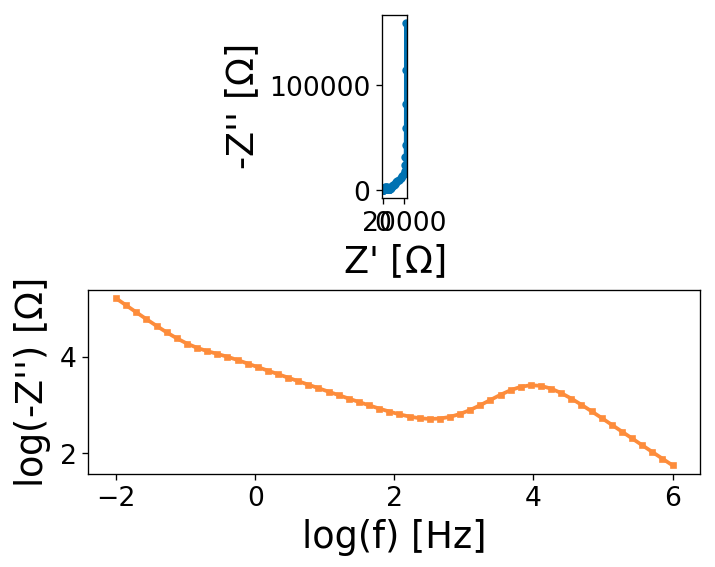

In [72]:
RsRQTLSQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQTLsQ(w=f_range[1], Rs=100, R1=5000, fs1=10000, n1=1, L=10, Ri=5000, Q=10**-5, n=1), bode='log_im', legend='off')

In [ ]:
params = Parameters()
Rs_guess = 100
params.add('Rs', value=Rs_guess, min=Rs_guess*.01, max=Rs_guess*10)

R1_guess = 500
params.add('R1', value=R1_guess, min=R1_guess*.01, max=R1_guess*10)
fs1_guess = 10**4
params.add('fs1', value=fs1_guess, min=fs1_guess*.01, max=fs1_guess*1000)
n1_guess = .9
params.add('n1', value=n1_guess, min=.7, max=1)

L_guess = 10
params.add('L', value=L_guess, min=L_guess*.01, max=L_guess*10)
Ri_guess = 5000
params.add('Ri', value=Ri_guess, min=Ri_guess*0.01, max=Ri_guess*1000)
Q_guess = 10**-5
params.add('Q', value=Q_guess, min=Q_guess*.001, max=Q_guess*100)
n_guess = 1
params.add('n', value=n_guess, min=.4, max=1)

RsRQTLSQ_example.EIS_sim_fit(params=params, circuit='R-RQ-TLsQ', bode='log_im')

In [ ]:
print(RsRQTLSQ_example.fit_Rs)
print()
print(RsRQTLSQ_example.fit_R1)
print(RsRQTLSQ_example.fit_fs1)
print(RsRQTLSQ_example.fit_n1)
print()
print(RsRQTLSQ_example.fit_L)
print(RsRQTLSQ_example.fit_Ri)
print(RsRQTLSQ_example.fit_Q)
print(RsRQTLSQ_example.fit_n)

# Fit of -R-TLsRQ-

Fitting a reactive porous electrode using R, n, and fs as the interfacial parameters, note that Q also can be used, although this is not illustrated

In [ ]:
RsTLs_example = EIS_sim(frange=f_range[0], circuit=cir_RsTLs(w=f_range[1], Rs=100, L=1, Ri=100, R=1, n=1, fs=10), bode='im', legend='off')

In [ ]:
params = Parameters()
Rs_guess = 100
params.add('Rs', value=Rs_guess, min=Rs_guess*.01, max=Rs_guess*100)

L_guess = 1
params.add('L', value=L_guess, min=L_guess*.01, max=L_guess*10)

Ri_guess = 100
params.add('Ri', value=Ri_guess, min=Ri_guess*0.01, max=Ri_guess*1000)

R_guess = 10
params.add('R', value=R_guess, min=R_guess*.001, max=R_guess*100)

n_guess = .9
params.add('n', value=n_guess, min=.7, max=1.001)

fs_guess = 1
params.add('fs', value=fs_guess, min=fs_guess*.001, max=fs_guess*100)

RsTLs_example.EIS_sim_fit(params=params, circuit='R-TLs', bode='log_im', weight_func='unity')

In [ ]:
print(RsTLs_example.fit_Rs)

print(RsTLs_example.fit_L)
print(RsTLs_example.fit_Ri)
print(RsTLs_example.fit_R)
print(RsTLs_example.fit_fs)
print(RsTLs_example.fit_n)

# Fit of -Rs-RQ-TLs-
Similar to above, a reactive porous electrode with a -(RQ)- circuit in series

In [ ]:
RsRQTLs_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQTLs(w=f_range[1], Rs=100, L=1, Ri=5000, R1=100, n1=1, fs1=10**4.5, R2=400, n2=1, fs2=1, Q1='none', Q2='none'), bode='log_im', legend='off')

In [ ]:
params = Parameters()

Rs_guess = 100
params.add('Rs', value=Rs_guess, min=Rs_guess*.01, max=Rs_guess*100)

R1_guess = 100
params.add('R1', value=R1_guess, min=R1_guess*.01, max=R1_guess*10)
fs1_guess = 10**4
params.add('fs1', value=fs1_guess, min=fs1_guess*.01, max=fs1_guess*1000)
n1_guess = .9
params.add('n1', value=n1_guess, min=.7, max=1)


L_guess = 1
params.add('L', value=L_guess, min=L_guess*.01, max=L_guess*10)
Ri_guess = 5000
params.add('Ri', value=Ri_guess, min=Ri_guess*0.01, max=Ri_guess*1000)
R2_guess = 400
params.add('R2', value=R2_guess, min=R2_guess*.001, max=R2_guess*100)
n2_guess = .9
params.add('n2', value=n2_guess, min=.7, max=1.001)
fs2_guess = 10**1
params.add('fs2', value=fs2_guess, min=10**-2, max=10**3)

RsRQTLs_example.EIS_sim_fit(params=params, circuit='R-RQ-TLs', bode='log', weight_func='unity')

In [ ]:
print(RsRQTLs_example.fit_Rs)
print()
print(RsRQTLs_example.fit_R1)
print(RsRQTLs_example.fit_fs1)
print(RsRQTLs_example.fit_n1)
print()
print(RsRQTLs_example.fit_L)
print(RsRQTLs_example.fit_Ri)
print(RsRQTLs_example.fit_R2)
print(RsRQTLs_example.fit_fs2)
print(RsRQTLs_example.fit_n2)

# Fit of -Rs-TLQ-
A transmission line with full complexity, this circuit is simular to -Rs-TLsQ-, but includes Rel, the electronic resistance of the electrode.


In [ ]:
RsTLQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsTLQ(w=f_range[1], L=100, Rs=100, Q=10**-7, n=1, Rel=10, Ri=100), bode='log', legend='off', nyq_xlim=[0,5000], nyq_ylim=[0,7500])

In [ ]:
params = Parameters()
Rs_guess = 100
params.add('Rs', value=Rs_guess, min=Rs_guess*.01, max=Rs_guess*10)
Q_guess = 10**-7
params.add('Q', value=Q_guess, min=Q_guess*.01, max=Q_guess*1000)
n_guess = 1
params.add('n', value=n_guess, min=.7, max=1)

Ri_guess = 100
params.add('Ri', value=Ri_guess, min=Ri_guess*.01, max=Ri_guess*10)
Rel_guess = 10
params.add('Rel', value=Rel_guess, min=Rel_guess*.01, max=Rel_guess*10)
L_guess = 100
params.add('L', value=L_guess, min=L_guess-.001, max=L_guess+0.001)


RsTLQ_example.EIS_sim_fit(params=params, circuit='R-TLQ', bode='log', nyq_xlim=[0,5000], nyq_ylim=[0,7500])

In [ ]:
print(RsTLQ_example.fit_Rs)
print(RsTLQ_example.fit_Q)
print(RsTLQ_example.fit_n)
print()
print(RsTLQ_example.fit_L)
print(RsTLQ_example.fit_Ri)
print(RsTLQ_example.fit_Rel)

# Fit of R-RQ-TLQ
Similar to the above with an -(RQ)- in series

In [ ]:
RsRQTLQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQTLQ(w=f_range[1], L=100, Rs=100, Q=10**-7, n=1, Rel=10, Ri=100, R1=1000, n1=1, fs1=10**5, Q1='none'), bode='log', legend='off', nyq_xlim=[0,5000], nyq_ylim=[0,7500])

In [ ]:
params = Parameters()
Rs_guess = 100
params.add('Rs', value=Rs_guess, min=Rs_guess*.01, max=Rs_guess*10)

R1_guess = 1000
params.add('R1', value=R1_guess, min=R1_guess*.01, max=R1_guess*10)
fs1_guess = 10**5
params.add('fs1', value=fs1_guess, min=fs1_guess*.01, max=fs1_guess*1000)
n1_guess = 1
params.add('n1', value=n1_guess, min=.7, max=1)

params.add('Rs', value=Rs_guess, min=Rs_guess*.01, max=Rs_guess*10)
Q_guess = 10**-7
params.add('Q', value=Q_guess, min=Q_guess*.01, max=Q_guess*1000)
n_guess = 1
params.add('n', value=n_guess, min=.7, max=1)

Ri_guess = 100
params.add('Ri', value=Ri_guess, min=Ri_guess*.01, max=Ri_guess*10)
Rel_guess = 10
params.add('Rel', value=Rel_guess, min=Rel_guess*.01, max=Rel_guess*10)
L_guess = 100
params.add('L', value=L_guess, min=L_guess-.001, max=L_guess+0.001)


RsRQTLQ_example.EIS_sim_fit(params=params, circuit='R-RQ-TLQ', bode='log', nyq_xlim=[0,5000], nyq_ylim=[0,7500])

In [ ]:
print(RsRQTLQ_example.fit_Rs)
print()
print(RsRQTLQ_example.fit_R1)
print(RsRQTLQ_example.fit_fs1)
print(RsRQTLQ_example.fit_n1)
print()
print(RsRQTLQ_example.fit_L)
print(RsRQTLQ_example.fit_Ri)
print(RsRQTLQ_example.fit_Rel)
print()
print(RsRQTLQ_example.fit_Q)
print(RsRQTLQ_example.fit_n)

# Fit of Rs-TL
A non-blocking porous electrode with full complexity

In [ ]:
RsTL_example = EIS_sim(frange=f_range[0], circuit=cir_RsTL(w=f_range[1], L=10, Rs=100, R=1000, Q=10**-5, n=1, Rel=10, Ri=10, fs='none'), bode='on', legend='off')

In [ ]:
params = Parameters()
Rs_guess = 100
params.add('Rs', value=Rs_guess, min=Rs_guess*.01, max=Rs_guess*10)
R_guess = 1250
params.add('R', value=R_guess, min=R_guess*.01, max=R_guess*10)
fs_guess = 10**1.5
params.add('fs', value=fs_guess, min=fs_guess*.01, max=fs_guess*100)
n_guess = 1
params.add('n', value=n_guess, min=.7, max=1)

Ri_guess = 10
params.add('Ri', value=Ri_guess, min=Ri_guess*.01, max=Ri_guess*10)
Rel_guess = 10
params.add('Rel', value=Rel_guess, min=Rel_guess*.01, max=Rel_guess*10)
L_guess = 10
params.add('L', value=L_guess, min=L_guess-.001, max=L_guess+0.001)


RsTL_example.EIS_sim_fit(params=params, circuit='R-TL', bode='on')

In [ ]:
print(RsTL_example.fit_Rs)
print(RsTL_example.fit_R)
print(RsTL_example.fit_fs)
print(RsTL_example.fit_n)
print()
print(RsTL_example.fit_L)
print(RsTL_example.fit_Ri)
print(RsTL_example.fit_Rel)

## Fit of -Rs-RQ-TL-
Similar to previous circuit with a -(RQ)- circuit in series

In [ ]:
RsRQTL_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQTL(w=f_range[1], L=10, Rs=100, R1=75, Q1='none', fs1=10**4.5, n1=1, R2=800, Q2='none', fs2=10**1, n2=1, Rel=10, Ri=10), bode='im', legend='off')

In [ ]:
params = Parameters()
Rs_guess = 100
params.add('Rs', value=Rs_guess, min=Rs_guess*.01, max=Rs_guess*10)

R1_guess = 20
params.add('R1', value=R1_guess, min=R1_guess*.01, max=R1_guess*10)
fs1_guess = 10**5
params.add('fs1', value=fs1_guess, min=fs1_guess*.1, max=fs1_guess*10)
n1_guess = 1
params.add('n1', value=n1_guess, min=.7, max=1)

R2_guess = 550
params.add('R2', value=R2_guess, min=R2_guess*.01, max=R2_guess*10)
fs2_guess = 10**1.5
params.add('fs2', value=fs2_guess, min=fs2_guess*.01, max=fs2_guess*10)
n2_guess = 1
params.add('n2', value=n2_guess, min=.7, max=1)

Ri_guess = 10
params.add('Ri', value=Ri_guess, min=Ri_guess*.01, max=Ri_guess*10)
Rel_guess = 10
params.add('Rel', value=Rel_guess, min=Rel_guess*.01, max=Rel_guess*10)
L_guess = 10
params.add('L', value=L_guess, min=L_guess-.001, max=L_guess+0.001)


RsRQTL_example.EIS_sim_fit(params=params, circuit='R-RQ-TL', bode='on', nan_policy='propagate')

In [ ]:
print(RsRQTL_example.fit_L)
print(RsRQTL_example.fit_Rs)
print()
print(RsRQTL_example.fit_R1)
print(RsRQTL_example.fit_fs1)
print(RsRQTL_example.fit_n1)
print()
print(RsRQTL_example.fit_R2)
print(RsRQTL_example.fit_fs2)
print(RsRQTL_example.fit_n2)
print()
print(RsRQTL_example.fit_Ri)
print(RsRQTL_example.fit_Rel)

## Fit of Rs-TL1Dsolid
This circuit has modified Randles circuit with a 1D finite space warburg element at the electrode/electrolyte interface inside the transmission line. The interface is therefore non-blocking with solid-state 1D diffusion diffusion as described in the above. This can be fitted using 'R-TL1Dsolid' circuit fit call.

In [ ]:
RsTL1Dsolid_example = EIS_sim(frange=f_range[0], circuit=cir_RsTL_1Dsolid(w=f_range[1], L=75*10**-3, D=10**-10, radius=250*10**-6, Rs=50, R=1500, Q=10**-6, n=1, R_w=4000, n_w=.24, Rel=1000, Ri=50000), bode='log_im', legend='off')

In [ ]:
params = Parameters()

Rs_guess = 50
params.add('Rs', value=Rs_guess, min=30, max=75)

R_guess = 1500
params.add('R', value=R_guess, min=R_guess*.01, max=R_guess*10)
Q_guess = 10**-6
params.add('Q', value=Q_guess, min=Q_guess*.01, max=Q_guess*1000)
n_guess = 1
params.add('n', value=n_guess, min=.7, max=1)


L_guess = 75*10**-3
params.add('L', value=L_guess, min=L_guess-.001, max=L_guess+0.001)
D_guess = 10**-10
params.add('D', value=D_guess, min=D_guess*.01, max=D_guess*10)
radius_guess = 250*10**-6
params.add('radius', value=radius_guess, min=radius_guess-.001, max=radius_guess+0.001)

Ri_guess = 50000
params.add('Ri', value=Ri_guess, min=Ri_guess*0.1, max=Ri_guess*10)
Rel_guess = 1000
params.add('Rel', value=Rel_guess, min=Rel_guess*.1, max=Rel_guess*10)
nw_guess = 0.24
params.add('n_w', value=nw_guess, min=0, max=0.5)
R_w_guess = 4000
params.add('R_w', value=R_w_guess, min=R_w_guess*0.01, max=R_w_guess*100)

RsTL1Dsolid_example.EIS_sim_fit(params=params, circuit='R-TL1Dsolid', bode='log', weight_func='modulus', nan_policy='raise')

In [ ]:
print(RsTL1Dsolid_example.fit_L)
print(RsTL1Dsolid_example.fit_D)
print(RsTL1Dsolid_example.fit_radius)
print(RsTL1Dsolid_example.fit_Rel)
print(RsTL1Dsolid_example.fit_Ri)
print()
print(RsTL1Dsolid_example.fit_R_w)
print(RsTL1Dsolid_example.fit_n_w)
print()
print(RsTL1Dsolid_example.fit_R)
print(RsTL1Dsolid_example.fit_Q)
print(RsTL1Dsolid_example.fit_n)

## Fit of Rs-RQ-TL1Dsolid
Similar to above with a -(RQ)- circuit in series

In [ ]:
RsRQTL1Dsolid_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQTL_1Dsolid(w=f_range[1], L=75*10**-3, D=10**-10, radius=250*10**-6, Rs=50, R1=5000, fs1='none', Q1=10**-10, n1=1, R2=1500, Q2=10**-6, n2=1, R_w=4000, n_w=0.24, Rel=1000, Ri=50000), bode='on', legend='off')#, nyq_xlim=[0,2000], nyq_ylim=[0,2000])

In [ ]:
params = Parameters()

Rs_guess = 50
params.add('Rs', value=Rs_guess, min=30, max=75)

R1_guess = 5000
params.add('R1', value=R1_guess, min=R1_guess*.01, max=R1_guess*10)
fs1_guess = 10**5
params.add('fs1', value=fs1_guess, min=10**4, max=fs1_guess*100)
n1_guess = 1
params.add('n1', value=n1_guess, min=.7, max=1)

R2_guess = 1500
params.add('R2', value=R2_guess, min=R2_guess*.01, max=R2_guess*10)
Q2_guess = 10**-6
params.add('Q2', value=Q2_guess, min=Q2_guess*.01, max=Q2_guess*1000)
n2_guess = 1
params.add('n2', value=n2_guess, min=.7, max=1)


L_guess = 75*10**-3
params.add('L', value=L_guess, min=L_guess-.001, max=L_guess+0.001)
D_guess = 10**-10
params.add('D', value=D_guess, min=D_guess*.01, max=D_guess*10)
radius_guess = 250*10**-6
params.add('radius', value=radius_guess, min=radius_guess-.001, max=radius_guess+0.001)

Ri_guess = 50000
params.add('Ri', value=Ri_guess, min=Ri_guess*0.1, max=Ri_guess*10)
Rel_guess = 1000
params.add('Rel', value=Rel_guess, min=Rel_guess*.1, max=Rel_guess*10)
nw_guess = 0.24
params.add('n_w', value=nw_guess, min=0, max=0.5)
R_w_guess = 4000
params.add('R_w', value=R_w_guess, min=R_w_guess*0.01, max=R_w_guess*100)

RsRQTL1Dsolid_example.EIS_sim_fit(params=params, circuit='R-RQ-TL1Dsolid', bode='log', weight_func='modulus', nan_policy='propagate')

In [ ]:
print(RsRQTL1Dsolid_example.fit_L)
print(RsRQTL1Dsolid_example.fit_D)
print(RsRQTL1Dsolid_example.fit_radius)
print(RsRQTL1Dsolid_example.fit_Rel)
print(RsRQTL1Dsolid_example.fit_Ri)
print()
print(RsRQTL1Dsolid_example.fit_R_w)
print(RsRQTL1Dsolid_example.fit_n_w)
print()
print(RsRQTL1Dsolid_example.fit_R1)
print(RsRQTL1Dsolid_example.fit_fs1)
print(RsRQTL1Dsolid_example.fit_n1)
print()
print(RsRQTL1Dsolid_example.fit_R2)
print(RsRQTL1Dsolid_example.fit_Q2)
print(RsRQTL1Dsolid_example.fit_n2)

# References
- [1] Bard A.J. and Faulkner L. R., "Electrochemical methods: Fundamentals and applications". New York: Wiley (2001)

- [2] Lasia A., "Electrochemical Impedance Spectroscopy and its Applications". New York: Springer (2014)

- [3] Bruce, P. "Electrical Measurements on Polymer Electrolytes". In "Polymer Electrolyte Reviews - 1"; MacCallum J.R., and Vincent, C.A., Elsevier Applied Science Publishers LTD, London.

- [4] Sørensen, P.R. and Jacobsen T., Electrochimica Acta, 27, (1982), 1671-1675, "Conductivity, Charge Transfer and Transport number - An AC-Investigation of the Polymer Electrolyte LiSCN-Poly(ethyleneoxide)"

- [5] De Levie R., and Delahay P., "Advances in Electrochemistry and Electrochemical Engineering", p. 329, Wiley-Interscience, New York (1973)

- [6] Bisquert J. Electrochemistry Communications 1, (1999), 429-435, "Anomalous transport effects in the impedance of porous film electrodes"

- [7] Bisquert J. J. Phys. Chem. B., 104, (2000), 2287-2298, "Doubling exponent models for the analysis of porous film electrodes by impedance. Relaxation of TiO2 nanoporous in aqueous solution"

- [8] Scipioni R., et al., ECS Transactions, 69, (2015), 71-80, ”A Physically-Based Equivalent Circuit Model for the Impedance of LiFePO$_4$/Graphite 26650 Cylindrical Cell”

- [9] Illig, J., Physically based Impedance Modelling of Lithium-ion Cells, KIT Scientific Publishing (2014)

- [10] Chueh W.C., et al. Nano Lett., 13, (2013), 886-872, ”Intercalation pathway in many-particle LiFePO$_4$ electrode revealed by nanoscale state-of-charge mapping”

- [11] Newville M., et al. "LMFIT: Non-Linear Least-Square Minimization and Curve-Fitting for Python" (2014) https://doi.org/10.5281/zenodo.11813

- [12] Nielsen, J., and Hjelm, J. Electrochimica Acta., 115, (2014), 31-45 "Impedance of SOFC electrode: A review and a comprehensive case study on the impedance of LSM:YSZ cathodes"

- [13] Knudsen, K.B. et al., J. Electrochemical Soc., 163, (2016), A2065-A2071, "An Electrochemical Impedance Spectroscopy Study on the Effects of the Surface- and Solution-Based Mechanisms in Li-O$_2$ Cells"